# init

In [ ]:
# Install extension
!pip install imbalanced-learn
!pip install shap xgboost
!pip install category_encoders

# 1. Import Library
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline as SkPipeline
from scipy.stats import chi2_contingency, probplot, stats
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import shap
import xgboost as xgb
from google.colab import drive
drive.mount('/content/drive')
import datetime
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, precision_recall_curve , fbeta_score, make_scorer, classification_report, confusion_matrix
from sklearn import svm
from category_encoders import BinaryEncoder
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.8 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
#2.dataset preparation
possible_paths = [
    '/content/drive/MyDrive/Bootcamp/Purwadhika/Final project/bank-additional-full.csv', # path adit
    '/content/drive/MyDrive/Colab Notebooks/Final project/bank-additional-full.csv', # path firza
    '/content/drive/MyDrive/Purwadhika/FINAL PROJECT/Final project/bank-additional-full.csv' # path Rendi
]

for path in possible_paths:
    if os.path.exists(path):
        df = pd.read_csv(path, sep=';')
        print(f"Loaded from: {path}")
        break
else:
    raise FileNotFoundError("CSV file not found in any of the specified paths.")
df.head()

Loaded from: /content/drive/MyDrive/Colab Notebooks/Final project/bank-additional-full.csv


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_prediction = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final project/dataset_with_predictions.csv',sep=',')

In [ ]:
df_prediction.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,high_contact_frequency,was_contacted_before,time_since_last_contact,previous_outcome_success,previous_outcome_success_str,macro_index_1,macro_index_2,y_encoded,deposit_probability (%),deposit_label
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,...,0,no,0.0,0,not_success,1.130779,0.655109,0,11.3,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,...,0,no,0.0,0,not_success,1.130779,0.655109,0,10.5,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,...,0,no,0.0,0,not_success,1.130779,0.655109,0,11.4,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,...,0,no,0.0,0,not_success,1.130779,0.655109,0,14.3,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,...,0,no,0.0,0,not_success,1.130779,0.655109,0,10.5,no


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.metrics import make_scorer, fbeta_score

# Define a custom F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

**Bank marketing campaigns dataset | Opening Deposit**

Created by:
- Aditya Rahman
- Muhammad Firza Alfajri
- Rendi Haryadi Dharmawan

# Business Problem Understanding

**Context**

Nexent Bank adalah institusi keuangan Eropa yang beroperasi di tujuh negara, bagian dari grup Nexent Bank N.V. dengan aktivitas perbankan ritel dan korporasi yang kuat. Kami telah hadir di Rumania sejak tahun 1993 dan secara bertahap membangun reputasi sebagai penyedia solusi keuangan yang andal bagi individu, UKM, dan korporasi.

Nexent bank (https://www.nexentbank.ro/en/) ingin meningkatkan deposito untuk operasional bisnis-nya, dikarenakan rendahnya tingkat utilisasi rasio deposito pada campaign sebelumnya, maka pada campaign saat ini bank ingin melihat nasabah mana saja yang berpotensi untuk melakukan deposito dengan tujuan **meningkatkan efisiensi cost** yang keluar serta m**emaksimalkan conversion rate deposito**


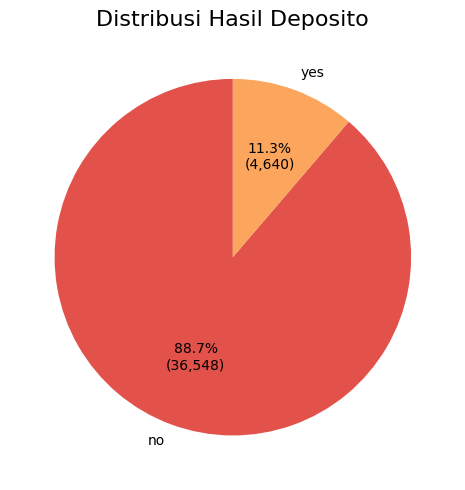

In [ ]:
# Membuat pie chart untuk hasil deposito (kolom 'y')
plt.figure(figsize=(5, 5))
# Data untuk pie chart
sizes = df['y'].value_counts()
labels = sizes.index
# Membuat label autopct yang menampilkan persentase dan jumlah
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})'
    return my_autopct

plt.pie(sizes, labels=labels, autopct=make_autopct(sizes), startangle=90, colors=sns.color_palette('Spectral'))
plt.title('Distribusi Hasil Deposito', fontsize=16)
plt.ylabel('') # Menghapus label y-axis yang tidak perlu
plt.tight_layout()
plt.show()

Berdasarkan Gambar diatas, bank telah memiliki data dari 41.188 nasabah, di mana hanya 4.640 nasabah (11,27%) yang melakukan deposito, sementara 36.548 nasabah (88,73%) tidak melakukan deposito.

Berdasarkan Regulation (EU) 2021/378 (ECB/2021/1)
mengatur minimum reserve requirement (MRR) dan Basel III / CRR (Capital Requirements Regulation) bank harus memiliki minimal dana yang tersimpan sebesar 7%, dengan hanya 11,27% dana yang terkunci dalam deposito, maka sisa dana yang bisa digunakan untuk dana operasional sekitar 4,27% yang berarti kurang optimal.

Oleh karena itu, bank perlu mengoptimalkan kampanye pemasaran untuk meningkatkan jumlah nasabah yang melakukan deposito.


---


**Target**

0: Nasabah tidak akan melakukan deposito.

1: Nasabah akan melakukan deposito.


---


**Problem Statement**

Bagaimana bank dapat mengidentifikasi dan memprediksi nasabah dengan probabilitas tinggi untuk membuka deposito berjangka?

Dengan demikian, tim marketing dapat meningkatkan tingkat konversi melalui **penargetan nasabah yang tepat** dan **mengoptimalkan biaya yang dikeluarkan** dengan mengurangi kontak ke nasabah yang memiliki potensi rendah untuk melakukan deposito.


---

**Goals**

Berdasarkan permasalahan tersebut, bank ingin memiliki kemampuan untuk memprediksi kemungkinan seorang nasabah akan melakukan deposito atau tidak. Ini bertujuan agar tim marketing dapat memfokuskan upaya mereka pada nasabah yang paling potensial.

Selain itu, bank juga ingin mengetahui faktor atau variabel apa yang paling memengaruhi keputusan nasabah untuk melakukan deposito. Dengan informasi ini, bank dapat membuat rencana kampanye pemasaran yang lebih efektif, seperti personalisasi penawaran atau strategi komunikasi yang lebih baik.


---

**Analytic Approach**

Pendekatan yang akan dilakukan adalah sebagai berikut:

Analisis Data: Menganalisis data nasabah untuk menemukan pola yang membedakan antara nasabah yang melakukan deposito dan yang tidak. Data yang dapat digunakan antara lain informasi demografi, riwayat transaksi, produk bank lain yang dimiliki, dan hasil kampanye pemasaran sebelumnya.

Pembangunan Model Klasifikasi: Membangun model klasifikasi yang dapat memprediksi probabilitas seorang nasabah akan melakukan deposito atau tidak.



---

**Metric Evaluation**

Terdapat dua jenis kesalahan yang mungkin terjadi dalam model ini:

* Type 1 error (False Positive): Model memprediksi bahwa nasabah akan melakukan
deposito, tetapi kenyataannya tidak.

  Konsekuensi: Terbuangnya biaya dan waktu tim marketing untuk menghubungi nasabah yang sebenarnya tidak tertarik.

* Type 2 error (False Negative): Model memprediksi bahwa nasabah tidak akan melakukan deposito, tetapi kenyataannya mereka sebenarnya akan melakukannya jika dihubungi.

  Konsekuensi: Kehilangan calon nasabah potensial yang dapat meningkatkan pendapatan bank.

Berdasarkan konsekuensinya, kita harus menyeimbangkan antara presisi (precision) dan recall dari kelas positif (nasabah potensial). Tujuannya adalah untuk meminimalkan biaya kampanye marketing tanpa kehilangan terlalu banyak nasabah potensial. Oleh karena itu, metrik utama yang akan digunakan adalah F1-Score atau Precision-Recall Curves, yang memberikan evaluasi gabungan dari kedua metrik tersebut.

## cost analysis


*Perhitungan ini bersifat simulasi
dilansir dari laman : https://www.nexentbank.ro/en/interests-quotes-and-exchange-rates/interests

Contoh campaign yang akan dibuat adalah program untuk minimal deposito €100, maka perhitungan cost nya sebagai berikut:

**Cost**
`
1.Telefon
- €18 untuk paket telfon sebulan (harga bervariasi tergantung negara uni eropa)
- Maka cost per orang nya adalah €0.06 (€18 /30 hari /10 orang ditelfon dalam sehari)
- atau dalam persentase 0,06% dari €100

Referensi https://www.phonetravelwiz.com/buying-a-sim-card-in-the-european-union-guide/


2.Transportasi
- Harga rata-rata bensin di uni eropa €1,61/L
- rata-rata penggunaan mobil di eropa dalam 100km mengkonsumsi 5L atau 20km/L
- Rata-rata jarak tempuh bervariasi tergantung negara, namun jika rata-rata uni eropa di 15.000 km/tahun atau 41 km/hari (15.000 km / 365 hari)
- Maka cost yang dikeluarkan untuk bertemu nasabah dalam sehari yaitu sebesar €3,22 (bensin €1,61 x 2L untuk jarak tempuh per hari)
-atau dalam persentase 3,2% dari €100

Referensi
https://www.mappr.co/thematic-maps/fuel-prices-europe/
https://www.iea.org/articles/fuel-economy-in-the-european-union
https://www.citizendailypost.com/faq/what-is-the-average-distance-traveled-by-car-in-europe

**Step selanjutnya cost ini akan dikeluarkan apabila closing dengan nasabah**

3.Bunga
- Bunga yang diberikan ke nasabah = 5%

Referensi https://id.tradingeconomics.com/country-list/interest-rate?continent=europe

4.Lainnya
- Operasional surat perijinan lainnya + Risiko Kredit = 2%
- Bukan karena deposito berisiko gagal bayar, tapi karena deposito akan membiayai penyaluran kredit yang punya risiko jadi perlunya menyiapkan dana cadangan.

Referensi: POJK No. 18/POJK.03/2016 — Penerapan Manajemen Risiko bagi Bank Umum

--------------------------------------------------------------------------
**Jika tidak closing deposito, maka total cost yang dikeluarkan sebesar 3,2% atau round down 3% dari total deposito**

**Jika berhasil closing deposito, maka total cost yang dikeluarkan sebesar 10,2% atau jika di round up 10% dari total deposito**



**Benefit**

- Pendapatan bunga dari penyaluran dana = 11%
- Fee & Investasi = 2%
- **Maka Total Benefit yang akan didapat sebesar 13%**

-----------------------------------------------
Business impact yang dapat terjadi adalah:

Type 1 error (False Positive): Model memprediksi bahwa nasabah akan melakukan
deposito, tetapi kenyataannya tidak.
- Jika perhitungan mengacu ke program deposito €100, maka setiap kegagalan penawaran depostio ke nasabah akan mengeluarkan €3/orang


Type 2 error (False Negative): Model memprediksi bahwa nasabah tidak akan melakukan deposito, tetapi kenyataannya mereka sebenarnya akan melakukannya jika dihubungi.
- Jika perhitungan mengacu ke program deposito €100, maka setiap kehilanggan opportunity kehilangan €13/orang

menimbang dari cost-benefit yang akan terjadi, dalam pengaturan model lanjutan seperti pengaturan threshold, perlu juga untuk menitikberatkan kemampuan model dalam meminimalisir false negative dengan metrics recall

# Data Understanding

Data source: https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

Note:
- Dataset tidak seimbang (no lebih banyak daripada yes di kolom "y")
- Sebagian besar fitur bersifat kategorikal
- Setiap baris data merepresentasikan informasi seorang nasabah yang ditawarkan melakukan deposito


| Attribute |  Attribute Group | Data Type| Description |
| --- | --- | --- | --- |
Age | Data Nasabah | Numerikal Integer | Usia Nasabah
Job | Data Nasabah | Kategorikal Text |  Jenis pekerjaan
Marital | Data Nasabah | Kategorikal Text | Status pernikahan
Education | Data Nasabah | Kategorikal Text | Tingkat pendidikan
Default | Data Nasabah | Kategorikal Text| Apakah Nasabah memiliki kredit macet
housing | Data Nasabah | Kategorikal Text | Apakah Nasabah memiliki pinjaman perumahan
loan | Data Nasabah | Kategorikal Text | Apakah Nasabah memiliki pinjaman pribadi
contact | Campaign | Kategorikal Text | Jenis komunikasi kontak ke nasabah
month | Campaign | Kategorikal Text | Bulan kontak terakhir dalam setahun
day_of_week | Campaign | Kategorikal Text | Hari kontak terakhir dalam seminggu
duration | Campaign | Numerikal Integer | Durasi kontak panggilan terakhir, dalam detik
campaign | Campaign | Numerikal Integer | Jumlah kontak yang dilakukan selama kampanye ini untuk Nasabah ini
pdays | Campaign | Numerikal Integer | Jumlah hari sejak kontak terakhir dari kampanye sebelumnya (value 999 belum pernah dihubungi)
previous | Campaign | Numerikal Integer | Berapa kali kontak Nasabah sebelum kampanye ini
poutcome | Campaign | Kategorikal Text | Hasil dari kampanye pemasaran sebelumnya
emp.var.rate | Makro ekonomi | Numerikal Float | Tingkat variasi pekerjaan
cons.price.idx | Makro ekonomi | Numerikal Float | Indeks harga konsumen
cons.conf.idx | Makro ekonomi | Numerikal Float | Indeks kepercayaan konsumen
euribor3m | Makro ekonomi | Numerikal Float | Suku bunga Euribor 3 bulan, dimana bank zona euro menawarkan untuk meminjamkan dana tanpa jaminan dengan rate khusus
nr.employed | Makro ekonomi | Numerikal Float | Jumlah karyawan
y | Target output | Kategorikal Text | Apakah Nasabah berlangganan deposit berjangka

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#Data Cleaning dan Exploratory Data Analysis (EDA)

## Menghapus feature yang tidak akan di gunakan

In [ ]:
df.drop('duration', axis=1, inplace=True )

In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Feature duration dihapus dikarenakan Atribut ini sangat memengaruhi target output (y).

Jika duration =0, maka y =′ no ′. Namun, durasi tidak diketahui sebelum panggilan dilakukan. Oleh karena itu,
fitur ini sebaiknya diabaikan jika tujuannya adalah model prediksi yang realistis. (tertulis di kaggle)


In [ ]:
df.default.value_counts()

,count
default,
no,32577
unknown,8596
yes,3


In [ ]:
df.drop('default', axis=1, inplace=True )

## Identifikasi missing value

In [ ]:
#Identify missing value, outlier, anomaly, duplicates, etc

# 1. Identifikasi Missing Value (null)
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Tidak ada nilai yang hilang (missing values) dalam dataset.")
else:
    print(missing_values[missing_values > 0].to_markdown(numalign="left", stralign="left"))



Tidak ada nilai yang hilang (missing values) dalam dataset.


## Identifikasi data duplikat lalu menghapus data yang duplikat

In [ ]:
# Identifikasi Duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat yang ditemukan: {duplicate_rows}")

Jumlah baris duplikat yang ditemukan: 1985


In [ ]:
#mengahpus baris yang duplikat
df.drop_duplicates(inplace=True)

## Distribusi feature numerik

In [ ]:
#Distribusi feature numerik
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000,39191.000000
mean,40.119364,2.624148,960.639739,0.179633,0.059771,93.576594,-40.507550,3.596459,5165.816029
std,10.472579,2.820195,191.366391,0.504316,1.578587,0.584413,4.647919,1.743925,72.869791
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.798000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Distrubusi data (Boxplot, QQ-plot, Histogram)

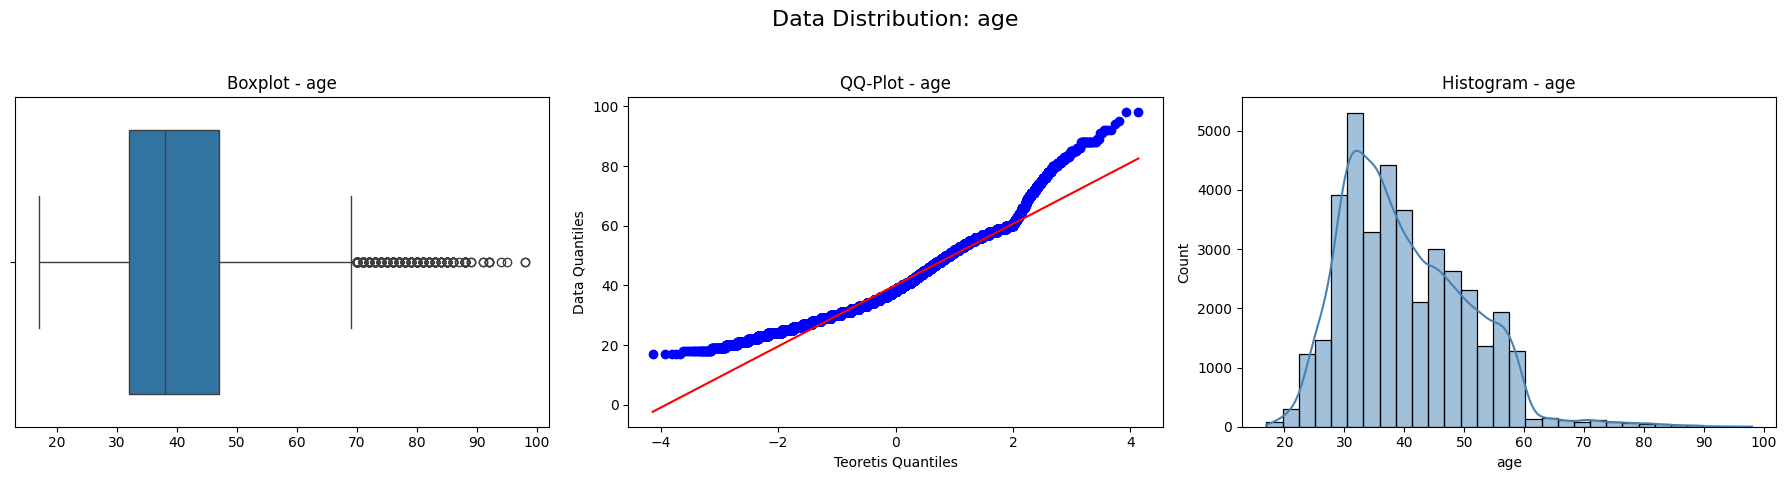

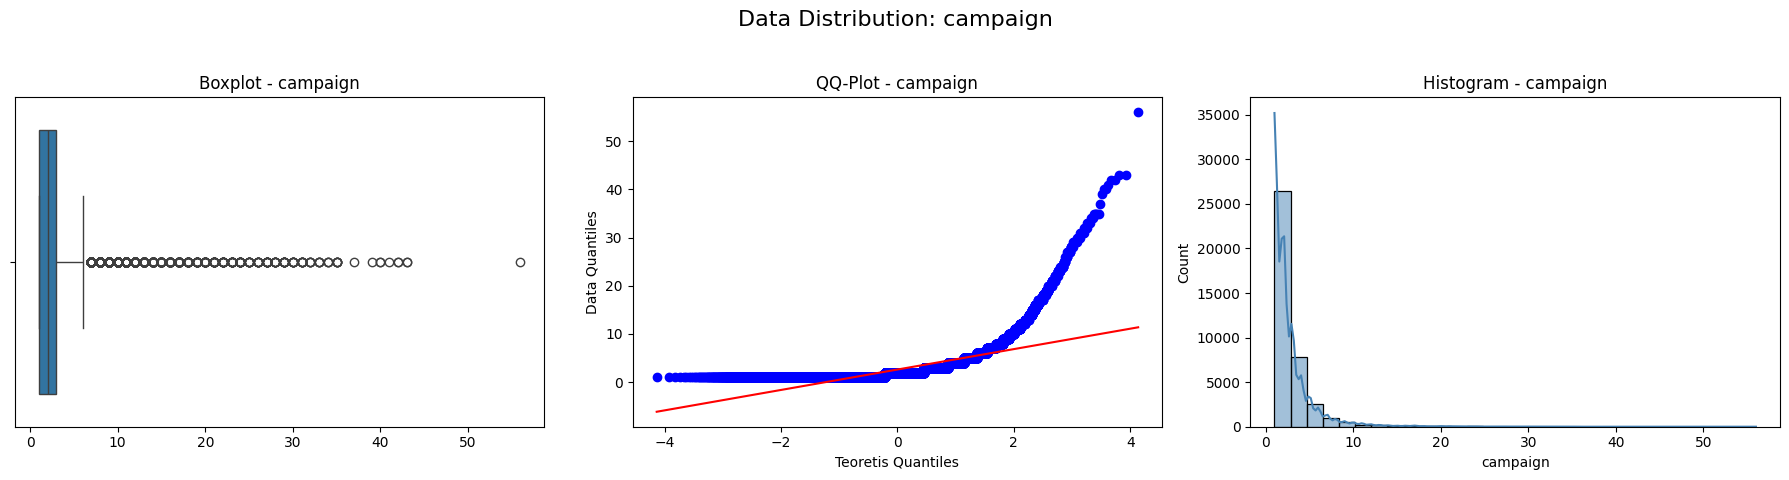

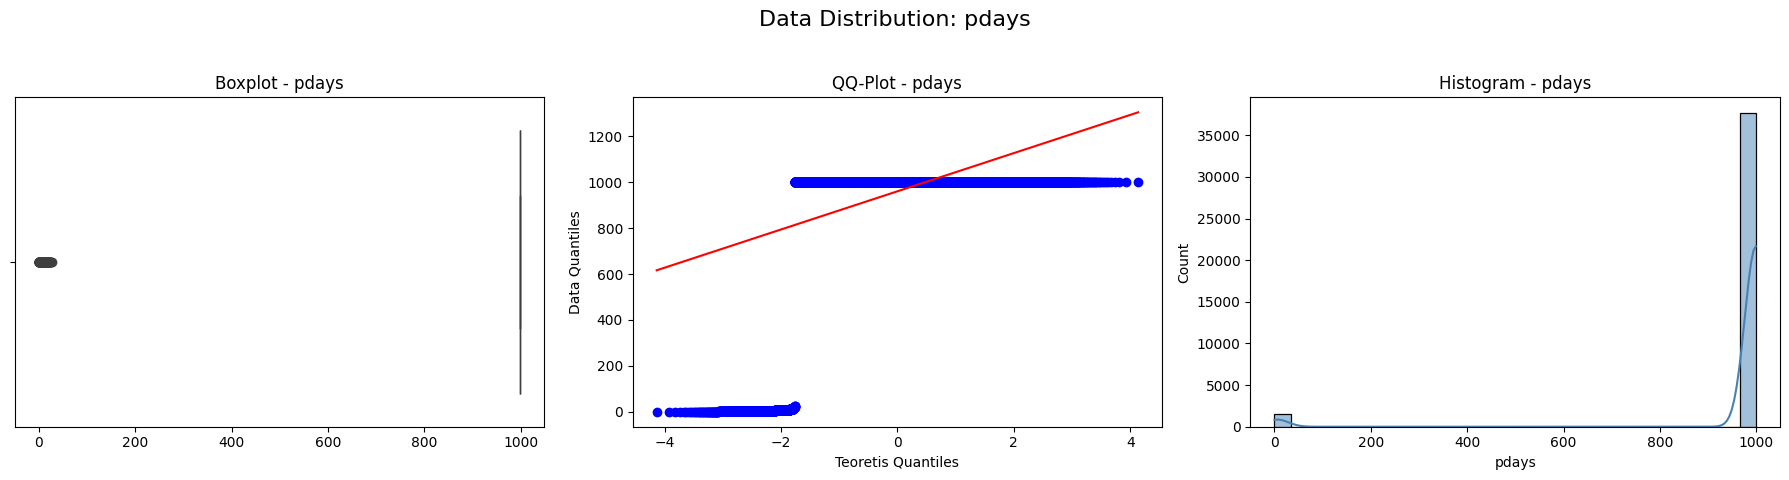

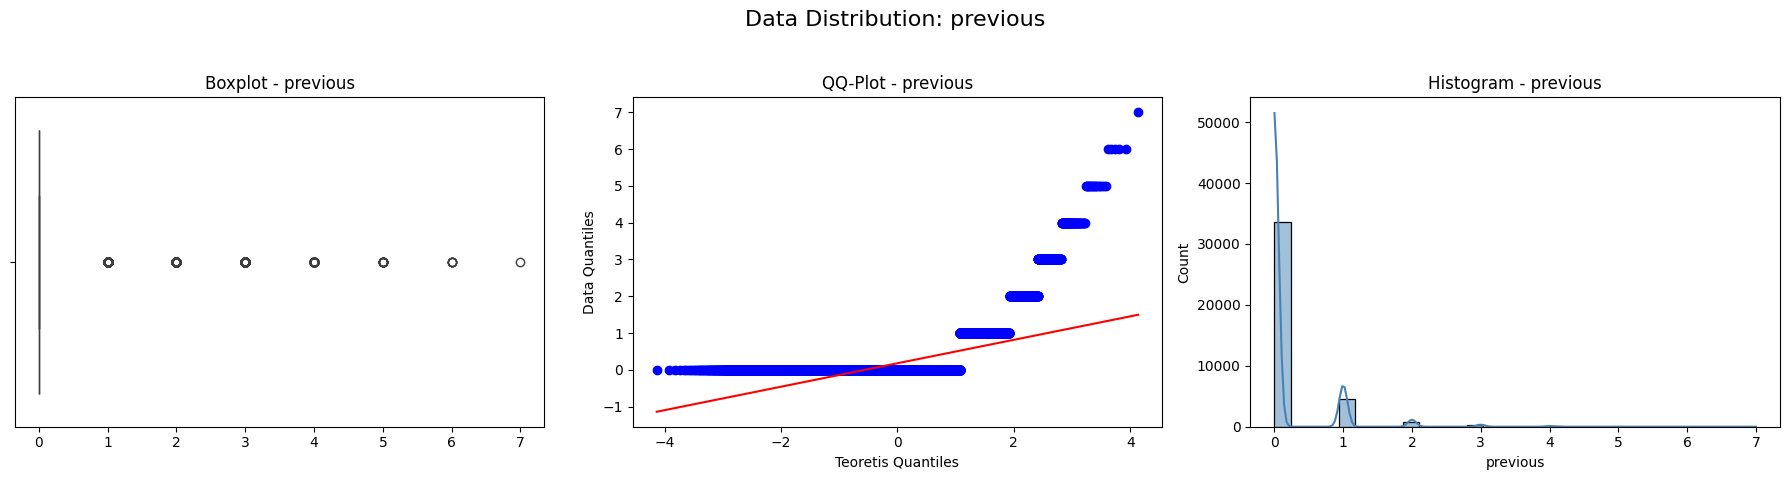

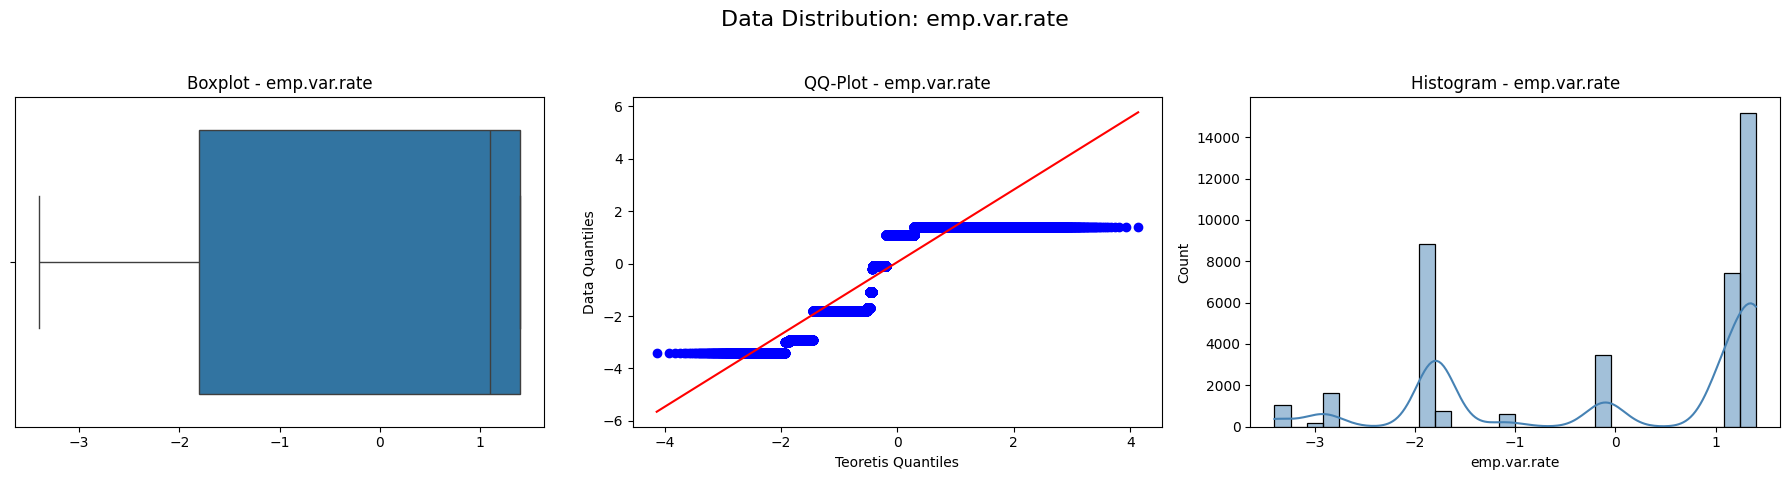

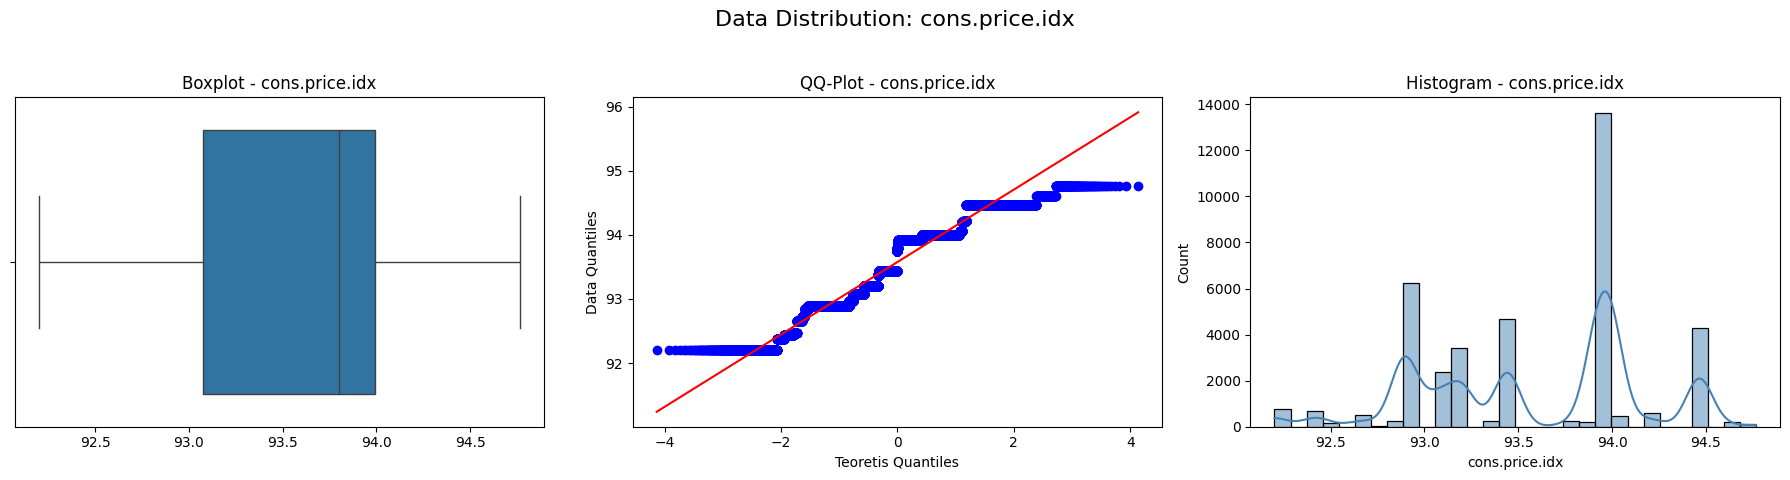

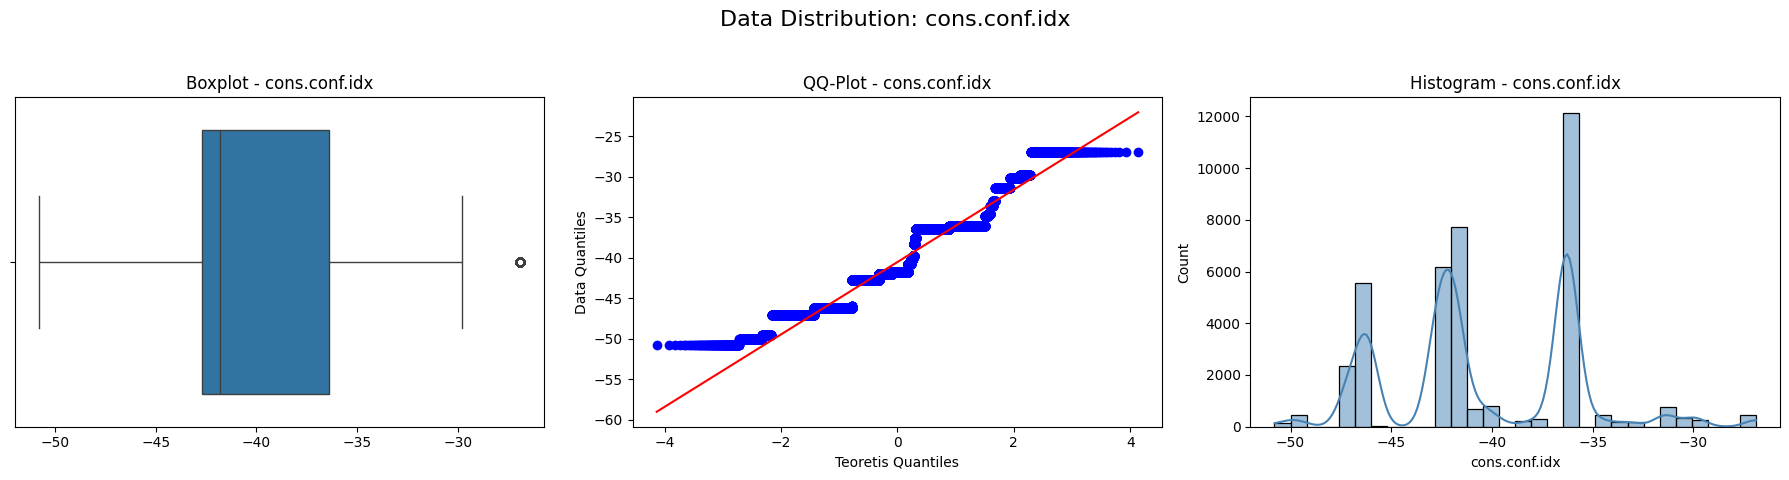

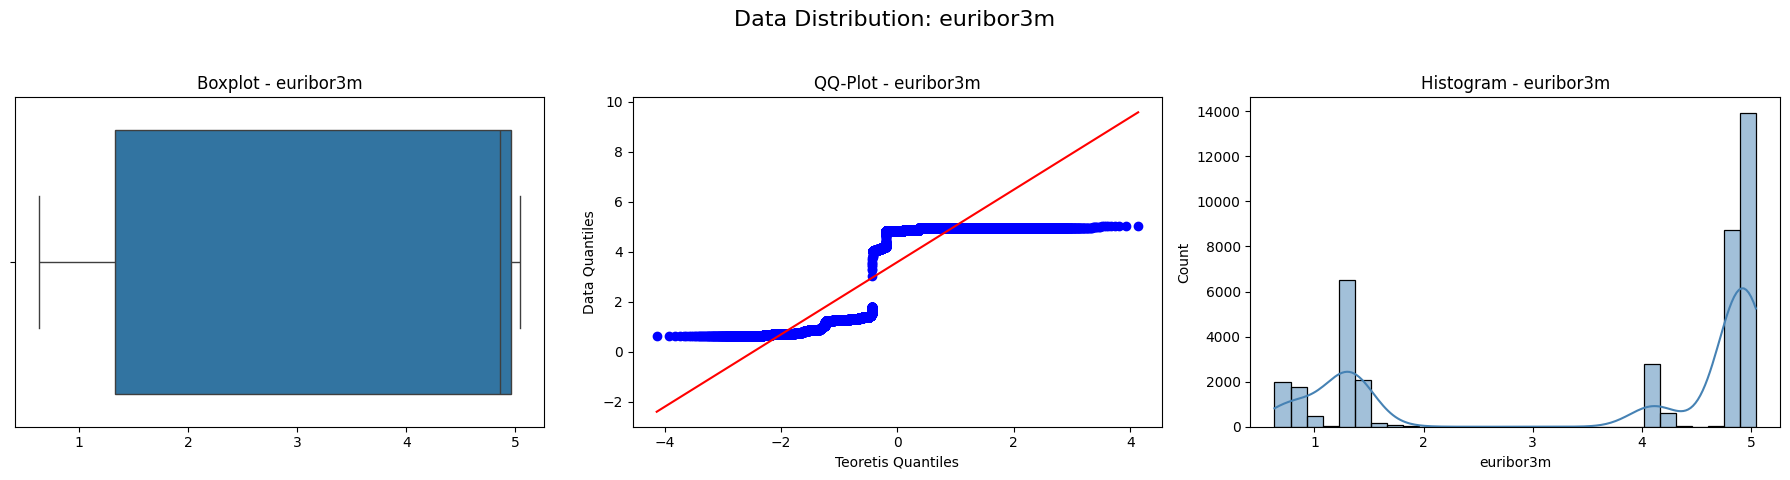

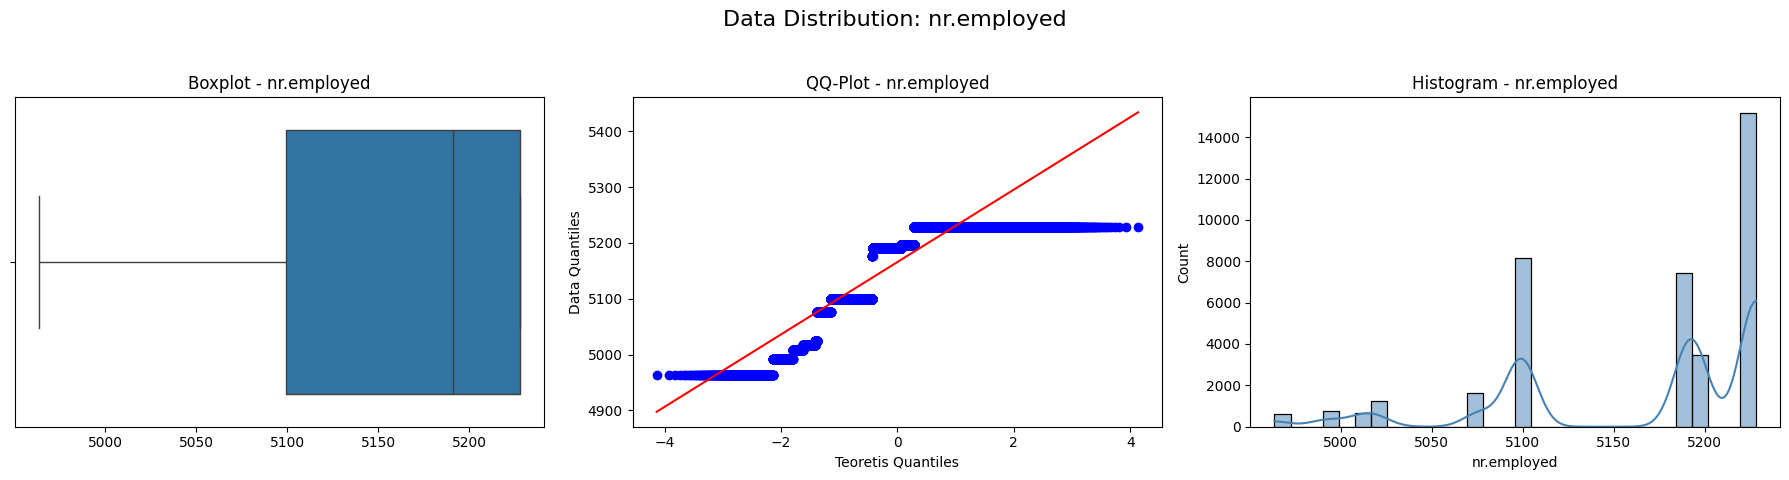

In [ ]:
# Data Distribution (Boxplot, QQ-plot, Histogram)
# Pembagian numerik dan kategorikal fitur
X = df.drop(columns=['y'])
y = df['y']
y_encoded = LabelEncoder().fit_transform(y)

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Loop setiap fitur numerik jadi tiga bagan dalam satu baris
for col in numeric_features:
    # Membuat figure dengan 1 baris, 3 kolom subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Data Distribution: {col}', fontsize=16)

    # Boxplot (subplot pertama)
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f"Boxplot - {col}")
    axes[0].set_xlabel("")

    # QQ-Plot (subplot kedua)
    probplot(df[col], dist="norm", plot=axes[1])
    axes[1].set_title(f"QQ-Plot - {col}")
    axes[1].set_xlabel("Teoretis Quantiles")
    axes[1].set_ylabel("Data Quantiles")

    # Histogram (subplot ketiga)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[2], color='steelblue')
    axes[2].set_title(f"Histogram - {col}")
    axes[2].set_xlabel(col)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**Insight Distribusi Atribut Nasabah**

**age:**
- Sebagian besar Nasabah berada dalam rentang usia 30-an hingga 40-an dengan melihat histogram menunjukkan distribusi yang miring ke kanan (skewed to the right)
- Beberapa nasabah sudah sangat terlihat, terlihat dari Boxplot menunjukkan beberapa outliers di usia yang sangat tua, yang merupakan hal normal.
- QQ-plot mungkin tidak sepenuhnya mengikuti garis normal, menunjukkan sedikit penyimpangan dari distribusi normal.

**duration (Durasi Panggilan):**
- Sebagian besar panggilan berdurasi pendek, terlihat pada histogram menunjukkan kemiringan ke kanan (skewed to the right) yang sangat kuat.
- Tetapi ada juga beberapa panggilan yang sangat lama (outliers) yang akan terlihat jelas di boxplot.
- QQ-plot akan sangat menyimpang dari garis normal, menegaskan distribusinya yang tidak normal.

---------------------------------------------
**Insight Distribusi Atribut Campaign**

**Campaign (Berapa kali di-kontak):**
- Sebagian besar nasabah di kontak beberapa kali, terlihat dari histogram miring ke kanan (skewed to the right).
- Tetapi ada beberapa nasabah yang dihubungi lebih dari 10 kali (outliers).
- Boxplot bisa mengidentifikasi outliter dengan mudah.

**pdays (Hari Sejak Kontak Terakhir):**
- Histogram untuk atribut ini akan terlihat memiliki dua puncak.
- Mayoritas Nasabah belum pernah dihubungi sebelumnya terlihat dari puncak yang sangat tinggi akan berada di nilai 999
- Puncak lainnya akan berada di nilai yang lebih rendah, mewakili Nasabah yang pernah dihubungi.
- QQ-plot akan sangat jauh dari garis normal, yang diharapkan karena sifat datanya yang terbagi dua.

**previous (Jumlah Kontak Sebelumnya):**
- Sebagian besar nasabah baru diprospek penawaran deposito terlihat dari mayoritas data akan berada di nilai 0
- Ini akan menghasilkan histogram yang sangat miring ke kanan, dengan banyak outliers pada klien yang memiliki riwayat kontak yang lebih banyak.


-----------------------------------------------
**Insight Distribusi Atribut Sosial dan Ekonomi**

**emp.var.rate dan euribor3m:**
- Kedua fitur ini sering kali menunjukkan distribusi yang tidak normal dan terkadang memiliki kemiringan.
- Ini mencerminkan perubahan kondisi ekonomi makro dari waktu ke waktu.

**cons.price.idx dan cons.conf.idx:**
- Nilai-nilai ini cenderung memiliki distribusi yang lebih terkonsentrasi, tetapi mungkin tidak sepenuhnya normal.
- QQ-plot akan menunjukkan sedikit lekukan, sementara histogram akan memiliki beberapa puncak.

**nr.employed:**
- Atribut ini cenderung memiliki distribusi yang berpusat, tetapi kemungkinan akan memiliki beberapa puncak atau miring tergantung pada periode waktu data diambil.
- Boxplot dapat menunjukkan beberapa pencilan jika ada perubahan tajam dalam jumlah karyawan pada waktu-waktu tertentu.




## korelasi antar data

In [ ]:
# Data Correlation (Nominal and Ratio scale correlation)
# Untuk data numerik (skala rasio) menggunakan koefisien korelasi Pearson
# Untuk data kategorikal (skala nominal) menggunakan Cramer's V.

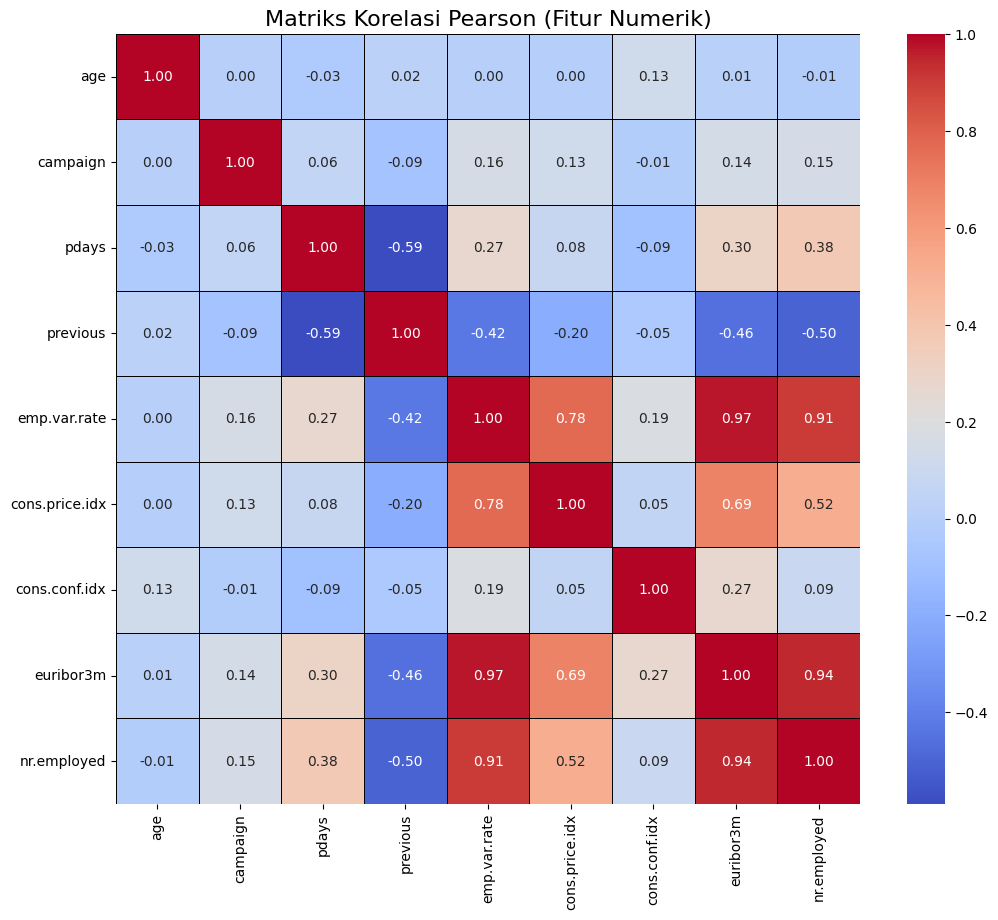

In [ ]:
# Analisis Korelasi untuk Fitur Numerik (Skala Rasio)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Menghitung matriks korelasi Pearson
pearson_corr = df[numeric_features].corr(method='pearson')

# Visualisasi matriks korelasi Pearson
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title('Matriks Korelasi Pearson (Fitur Numerik)', fontsize=16)
plt.show()

**Korelasi Pearson:**
- Nilai mendekati 1 atau -1 menunjukkan korelasi yang kuat.
- Nilai mendekati 0 menunjukkan korelasi yang lemah atau tidak ada.

-----------------------------------------------
**Insight data numerik (matriks korelasi Pearson)**

**KORELASI POSITIF**

**euribor3m dan emp.var.rate:**
- Kedua atribut ini memiliki korelasi positif yang sangat kuat (0.97).
- Karena suku bunga (Euribor 3 bulan) seringkali bergerak searah dengan kebijakan bank sentral yang juga memengaruhi tingkat variasi ketenagakerjaan.

**nr.employed dan euribor3m:**
- Kedua atribut ini menunjukkan korelasi positif yang kuat. (0.95)
- Ini mengindikasikan bahwa semakin banyak orang yang dipekerjakan, suku bunga juga cenderung lebih tinggi, yang bisa menjadi tanda ekonomi yang membaik.

**nr.employed dan emp.var.rate:**
- Menunjukkan korelasi positif yang kuat, menegaskan adanya hubungan antar atribut sosial dan ekonomi. (0.91)

**KORELASI NEGATIF**

**pdays dan previous**
- Semakin sering klien dihubungi (tingginya previous), semakin sedikit hari yang berlalu sejak kontak terakhir (pdays yang rendah). (-0.59)
- Begitupula sebaliknya

## Matriks keterkaitan antara fitur categorical Cramer's V (Fitur Kategorikal)

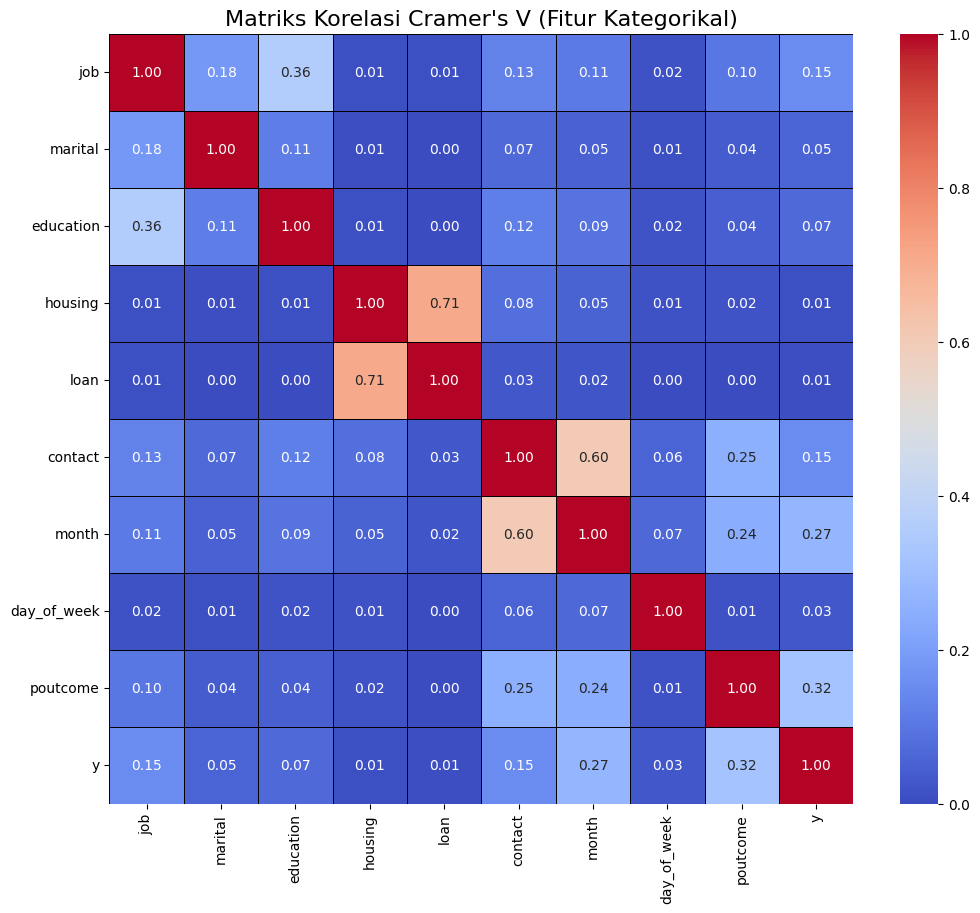

In [ ]:
# Fungsi untuk menghitung Cramer's V cek ulang penggunaan dan definisi cramers v
def cramers_v(x, y):
    """
    Menghitung Cramer's V, sebuah ukuran keterkaitan antara fitur kategorikal.
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corrected = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corrected = r - ((r-1)**2)/(n-1)
    k_corrected = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corrected / min( (k_corrected-1), (r_corrected-1)))

# Analisis keterkaitan untuk Fitur Kategorikal (Skala Nominal)
categorical_features = df.select_dtypes(include='object').columns.tolist()

# Menghitung matriks Cramer's V
cramers_v_corr = pd.DataFrame(index=categorical_features, columns=categorical_features)
for col1 in categorical_features:
    for col2 in categorical_features:
        cramers_v_corr.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Konversi DataFrame ke tipe float
cramers_v_corr = cramers_v_corr.astype(float)

# Visualisasi matriks korelasi Cramer's V
plt.figure(figsize=(12, 10))
sns.heatmap(cramers_v_corr, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, linecolor='black')
plt.title("Matriks Korelasi Cramer's V (Fitur Kategorikal)", fontsize=16)
plt.show()

**Korelasi Cramer's V:**
- Nilai mendekati 1 menunjukkan hubungan yang kuat antara dua variabel kategorikal
- sedangkan nilai mendekati 0 menunjukkan tidak ada hubungan.
- digunakan sebagai analisa feature importance awal

-----------------------------------------------------
**Insight data kategorikal (Matriks Korelasi Cramer's V)**

**INSIGHT:**

**housing dan loan (0.71)**
- Status kepemilikan pinjaman perumahan dan pinjaman pribadi memiliki hubungan yang signifikan.


**contact dan month (0.61):**
- Metode kontak yang digunakan (cellular atau telephone) sangat bergantung pada bulan campaign.

**job dan education (0.36):**
- nilai ini menunjukkan bahwa jenis pekerjaan seseorang memiliki hubungan yang cukup kuat dengan tingkat pendidikannya.






###Proporsi fitur kategori dengan keberhasilan deposit

In [ ]:
def feature_success_table(df, target_col):
    results = []
    total_data = len(df)
    cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_features = [col for col in cat_features if col != target_col]

    for col in cat_features:
        grouped = df.groupby(col)[target_col].agg(['mean', 'sum', 'count']).reset_index()
        grouped['Feature'] = col
        grouped.rename(columns={
            col: 'Value',
            'mean': 'Success Rate',
            'sum': 'Evidence',
            'count': 'Total Count'
        }, inplace=True)
        grouped['Proportion (%)'] = (grouped['Total Count'] / total_data * 100).round(1)
        grouped['Total Data'] = total_data
        results.append(grouped)

    final_df = pd.concat(results, ignore_index=True)
    final_df.sort_values(by='Success Rate', ascending=False, inplace=True)
    return final_df[['Feature', 'Value', 'Success Rate', 'Evidence', 'Total Count', 'Proportion (%)']]

proportion_df = df.copy()
# Example usage:
proportion_df['y'] = proportion_df['y'].map({'yes':1, 'no':0})  # Convert target to numeric
table = feature_success_table(proportion_df, target_col='y')
table

,Feature,Value,Success Rate,Evidence,Total Count,Proportion (%)
49,poutcome,success,0.651603,894,1372,3.5
37,month,mar,0.505660,268,530,1.4
34,month,dec,0.486188,88,181,0.5
41,month,sep,0.452128,255,564,1.4
40,month,oct,0.441301,312,707,1.8
8,job,student,0.318075,271,852,2.2
5,job,retired,0.256548,431,1680,4.3
20,education,illiterate,0.222222,4,18,0.0
32,month,apr,0.210028,532,2533,6.5
30,contact,cellular,0.155067,3810,24570,62.7


1. Segmen dengan Success Rate Tinggi

poutcome = success → Success rate 65.16%, jumlah 894 dari 1,372 (3.5% populasi).
Insight: Nasabah yang sebelumnya pernah dihubungi dan berhasil, kemungkinan besar akan kembali berhasil. Harus jadi prioritas follow-up.

Bulan tertentu:

mar (50.57%), dec (48.62%), sep (45.21%), oct (44.13%) → semua punya tingkat konversi tinggi, walaupun total count rendah.
Insight: Ada pola musiman yang signifikan, terutama Maret–Oktober.

job = student (31.8%) dan job = retired (25.65%).
Insight: Segmen mahasiswa dan pensiunan cenderung lebih responsif dibanding profesi lain.

2. Segmen Mayoritas tapi dengan Success Rate Rendah

Segmen ini besar jumlahnya, tapi tingkat keberhasilannya di bawah rata-rata → potensi ada jika dioptimasi pendekatan.

contact = cellular → Proporsi terbesar (62.7%), tapi success rate hanya 15.51%.
Insight: Mayoritas kontak dilakukan lewat ponsel, tapi efektivitas rendah. Mungkin perlu optimasi skrip telemarketing atau waktu panggilan.

marital = married (60.5%) → Success rate 10.61%.

loan = no (81.8%) → Success rate 11.88%.

month = may (33.7%) → Success rate 6.68% → meskipun jumlahnya besar, bulan ini tidak efektif.

3. Segmen dengan Success Rate Rendah + Proporsi Kecil

Ini adalah segmen yang bisa diabaikan atau diubah strateginya karena ROI kecil:

job = blue-collar → 7.24% success rate.

poutcome = nonexistent → 9.21% success rate (mayoritas kasus).

4. Pola Penting

Poutcome adalah fitur paling prediktif. Dari data:

success → 65%

failure → 14%

nonexistent → 9%
Strategi harus memprioritaskan yang pernah berhasil dan menurunkan intensitas pada yang tidak punya riwayat kontak.

Musim/Bulan sangat berpengaruh:

Maret, Desember, September, Oktober → sangat tinggi.

Mei → meskipun volume besar, konversi paling buruk.

Jenis pekerjaan juga mempengaruhi:

Student & retired → tinggi.

Blue-collar, entrepreneur, services → rendah.



## Identifikasi kolom kategori dan Data kardinalitas

In [ ]:
# Mengidentifikasi kolom-kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns

# Show data jumlah dari setiap kategori untuk setiap atribut
for col in categorical_cols:
    print(f"\n--- Atribut: {col} ---")
    print(f'\n Jumlah Nilai Unik untuk atribut {col} : {df[col].nunique()}')
    value_counts = df[col].value_counts().reset_index()
    value_counts.columns = ['Nilai Kategori', 'Jumlah']

    # Buat persentase distribusi
    total_count_col = value_counts['Jumlah'].sum()
    value_counts['Persentase'] = (value_counts['Jumlah'] / total_count_col) * 100

    # Buat format koma sebagai pemisah ribuan di kategori
    value_counts['Jumlah'] = value_counts['Jumlah'].apply(lambda x: f"{x:,}")
    # Memformat kolom 'Persentase'
    value_counts['Persentase'] = value_counts['Persentase'].apply(lambda x: f"{x:.2f}%")

    print(value_counts.to_markdown(index=False, numalign="left", stralign="left"))
    total_count = len(df[col])
    # Buat format koma sebagai pemisah ribuan di total
    print(f"\nTotal: {total_count:,}")


--- Atribut: job ---

 Jumlah Nilai Unik untuk atribut job : 12
| Nilai Kategori   | Jumlah   | Persentase   |
|:-----------------|:---------|:-------------|
| admin.           | 9,824    | 25.07%       |
| blue-collar      | 8,743    | 22.31%       |
| technician       | 6,371    | 16.26%       |
| services         | 3,776    | 9.63%        |
| management       | 2,813    | 7.18%        |
| retired          | 1,680    | 4.29%        |
| entrepreneur     | 1,403    | 3.58%        |
| self-employed    | 1,384    | 3.53%        |
| housemaid        | 1,028    | 2.62%        |
| unemployed       | 992      | 2.53%        |
| student          | 852      | 2.17%        |
| unknown          | 325      | 0.83%        |

Total: 39,191

--- Atribut: marital ---

 Jumlah Nilai Unik untuk atribut marital : 4
| Nilai Kategori   | Jumlah   | Persentase   |
|:-----------------|:---------|:-------------|
| married          | 23,693   | 60.46%       |
| single           | 10,964   | 27.98%       |
| 

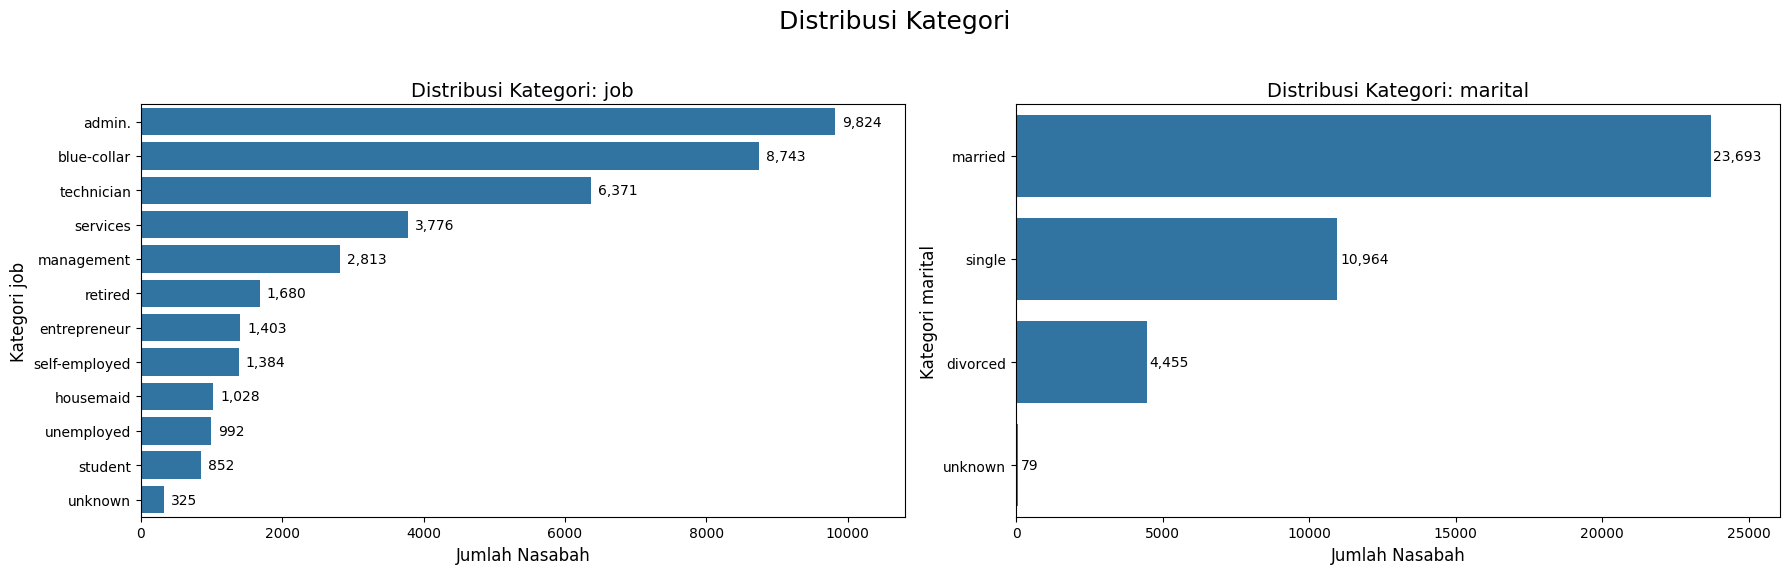

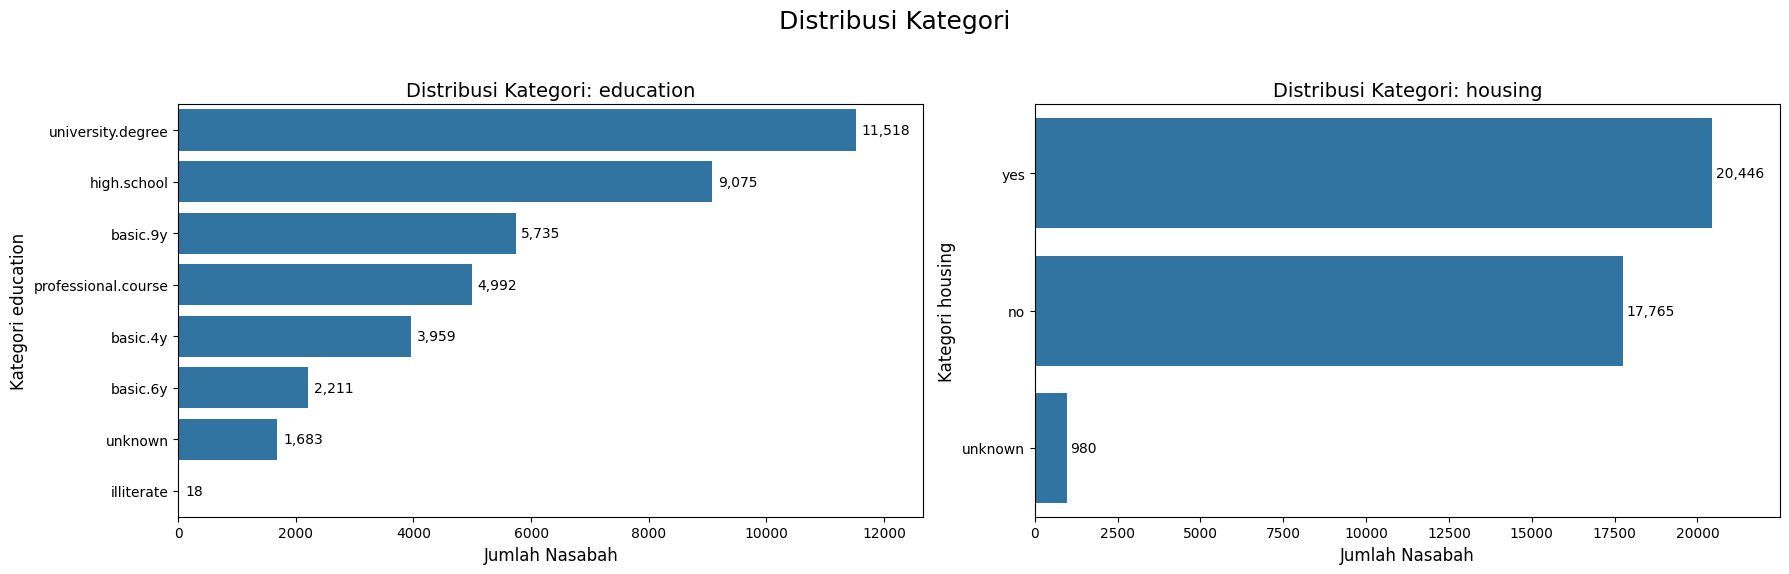

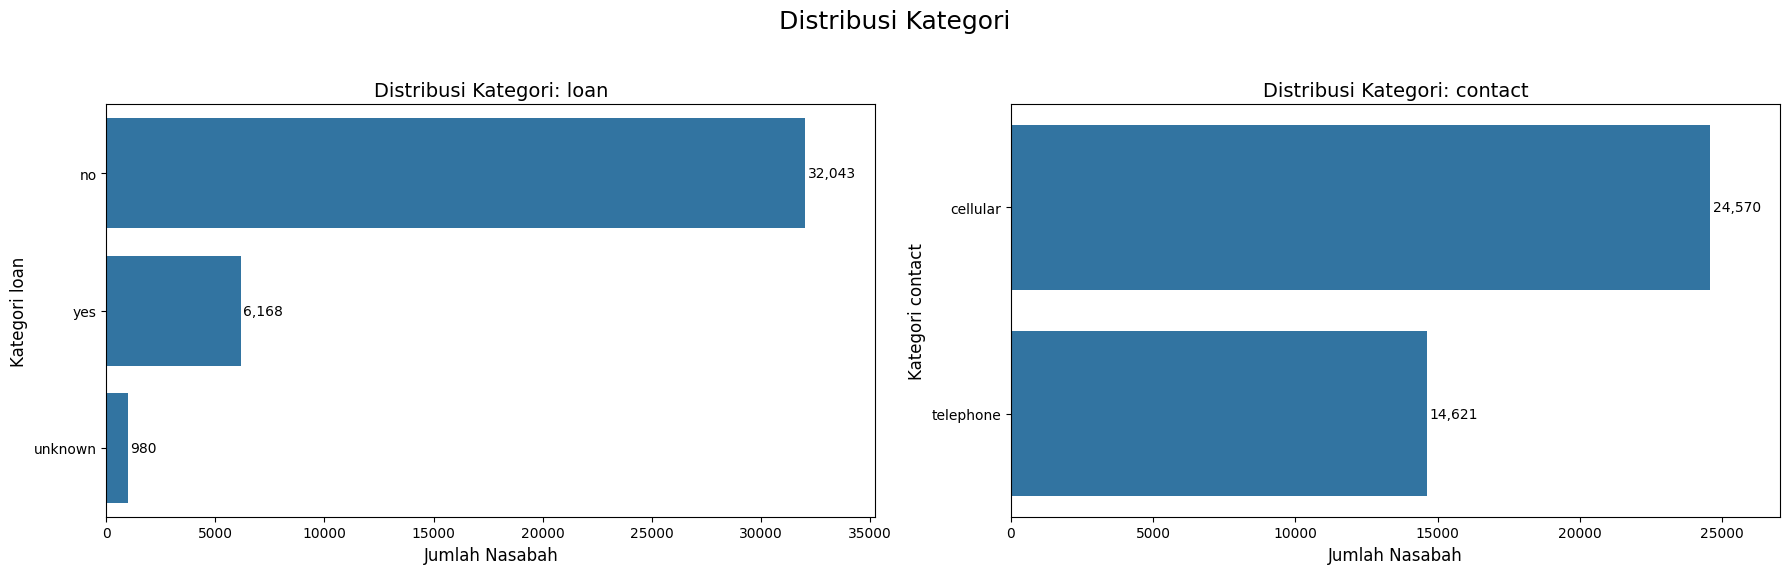

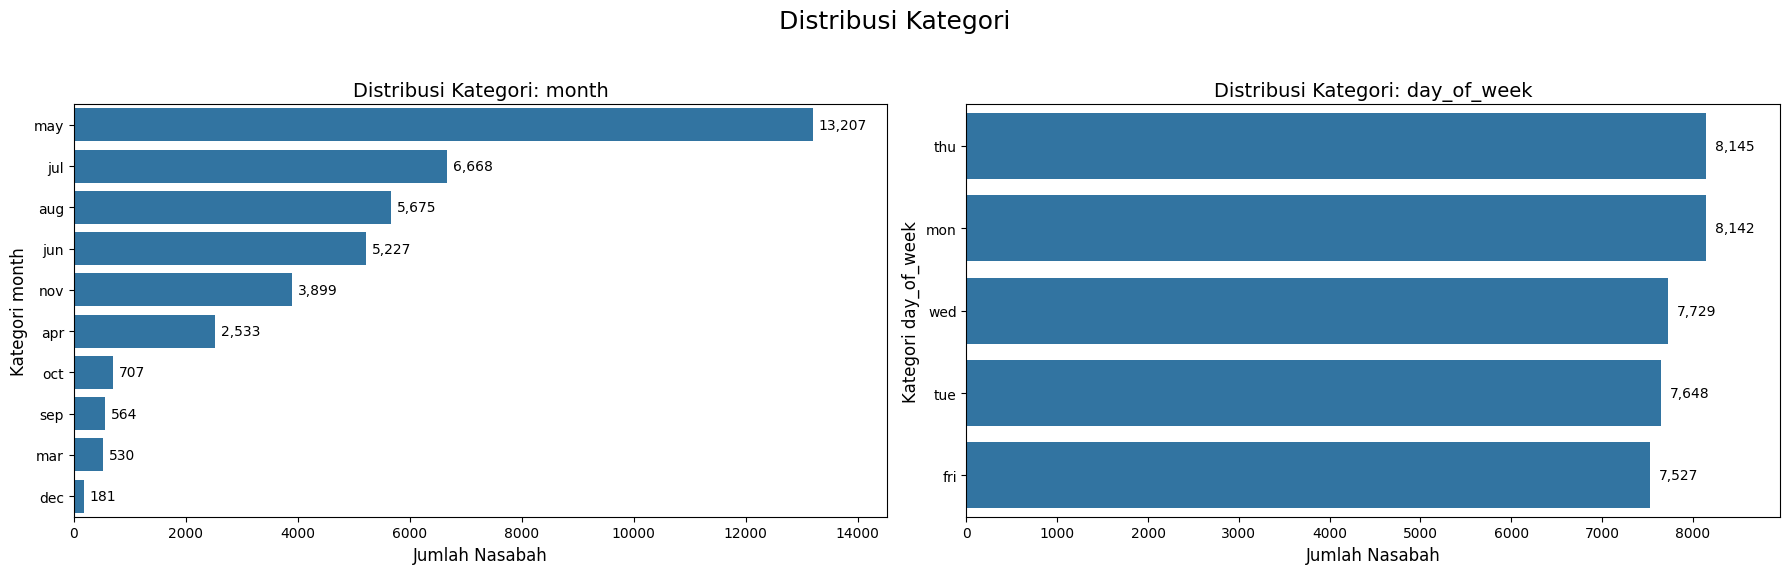

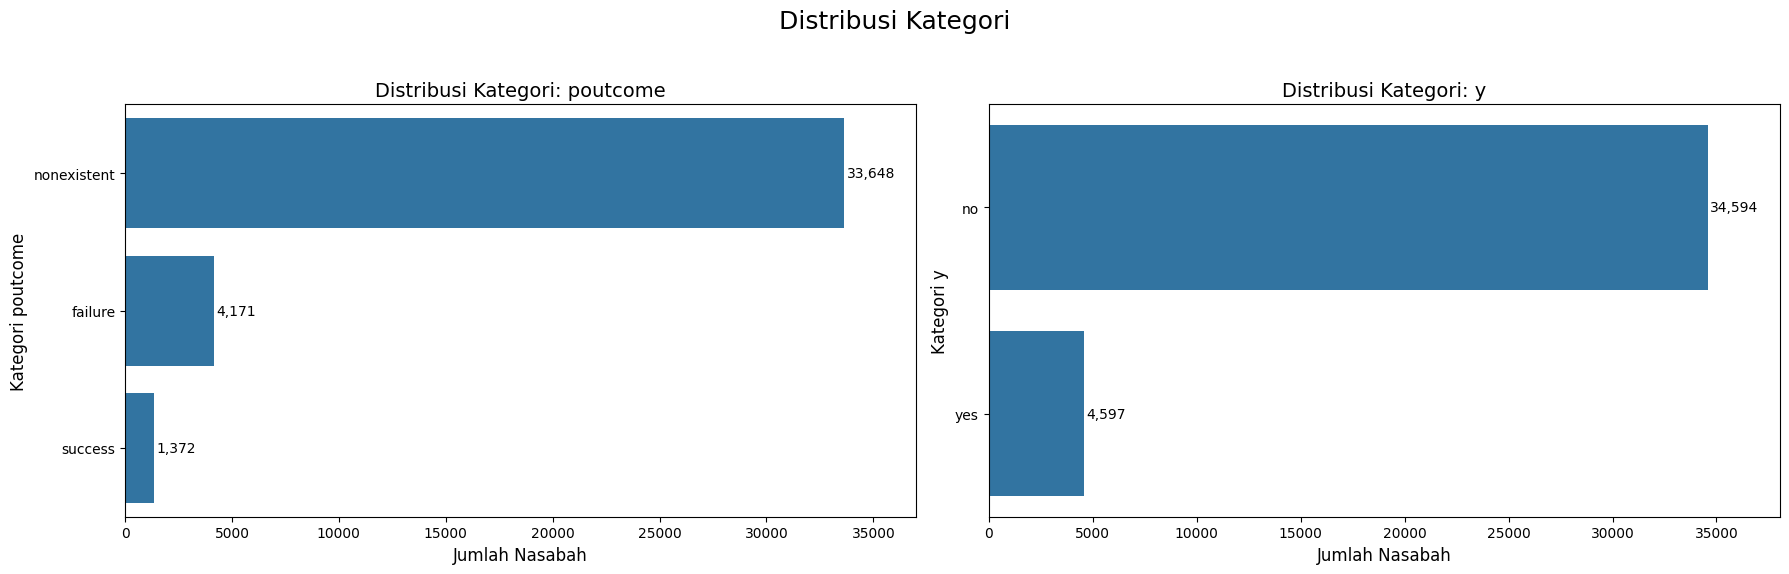

In [ ]:
# Visualisasi

# Mengiterasi setiap 2 kolom untuk membuat bagan dalam satu baris
for i in range(0, len(categorical_cols), 2):
    # Membuat figure dengan 1 baris dan 2 kolom subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # Judul utama untuk baris
    fig.suptitle(f'Distribusi Kategori', fontsize=18)

    # Plot untuk kolom pertama
    if i < len(categorical_cols):
        col1 = categorical_cols[i]
        sns.countplot(y=col1, data=df, order=df[col1].value_counts().index, ax=axes[0])
        axes[0].set_title(f"Distribusi Kategori: {col1}", fontsize=14)
        axes[0].set_xlabel('Jumlah Nasabah', fontsize=12)
        axes[0].set_ylabel(f'Kategori {col1}', fontsize=12)
        axes[0].set_xlim(right=df[col1].value_counts().max() * 1.1)

        # Menambahkan label nilai pada bar
        for p in axes[0].patches:
            width = p.get_width()
            axes[0].text(width + 100, p.get_y() + p.get_height() / 2,
                        f'{int(width):,}',
                        ha='left', va='center')

    # Plot untuk kolom kedua
    if i + 1 < len(categorical_cols):
        col2 = categorical_cols[i+1]
        sns.countplot(y=col2, data=df, order=df[col2].value_counts().index, ax=axes[1])
        axes[1].set_title(f"Distribusi Kategori: {col2}", fontsize=14)
        axes[1].set_xlabel('Jumlah Nasabah', fontsize=12)
        axes[1].set_ylabel(f'Kategori {col2}', fontsize=12)
        axes[1].set_xlim(right=df[col2].value_counts().max() * 1.1)

        # Menambahkan label nilai pada bar
        for p in axes[1].patches:
            width = p.get_width()
            axes[1].text(width + 100, p.get_y() + p.get_height() / 2,
                        f'{int(width):,}',
                        ha='left', va='center')
    else:
        # Jika jumlah kolom ganjil, sembunyikan subplot kedua
        fig.delaxes(axes[1])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**Insight :**

* Distribusi Pekerjaan (job): Pekerjaan "admin.", "blue-collar", dan "technician" adalah tiga pekerjaan yang paling banyak muncul dalam dataset. Ini menunjukkan bahwa mayoritas nasabah berasal dari sektor-sektor ini.

* Distribusi Status Pernikahan (marital): Mayoritas nasabah berstatus "married" (menikah), diikuti oleh "single" (lajang) dan "divorced" (cerai). Status "unknown" memiliki jumlah yang sangat kecil.

* Distribusi Tingkat Pendidikan (education): Tingkat pendidikan "university.degree" adalah yang paling umum di antara nasabah, diikuti oleh "high.school". Ada juga nasabah dengan tingkat pendidikan dasar ("basic.9y", "basic.4y", "basic.6y") dan jumlah yang sangat kecil yang "illiterate" (tidak dapat membaca dan menulis) atau "unknown".

* Distribusi Default Kredit (default): Sebagian besar nasabah tidak memiliki kredit macet ("no"). Ada sejumlah besar nasabah dengan status "unknown", dan sangat sedikit yang memiliki kredit macet ("yes"). Jumlah yang sangat kecil untuk "yes" menunjukkan bahwa data ini mungkin tidak mewakili populasi kredit macet secara umum atau ada masalah dalam pengumpulan data untuk kategori ini.
Distribusi Kepemilikan Rumah (housing): Jumlah nasabah yang memiliki pinjaman perumahan ("yes") sedikit lebih banyak dibandingkan yang tidak memiliki ("no"). Ada juga sejumlah kecil dengan status "unknown".

* Distribusi Pinjaman Pribadi (loan): Mayoritas nasabah tidak memiliki pinjaman pribadi ("no"). Jumlah yang memiliki pinjaman pribadi ("yes") jauh lebih sedikit, dan ada sejumlah kecil dengan status "unknown".

* Distribusi Metode Kontak (contact): Kontak melalui "cellular" (ponsel) jauh lebih sering digunakan dibandingkan "telephone" (telepon rumah).

* Distribusi Bulan Kontak (month): Bulan "may" (Mei) adalah bulan dengan jumlah kontak terbanyak, diikuti oleh "jul" (Juli) dan "aug" (Agustus). Bulan-bulan lain memiliki jumlah kontak yang lebih sedikit, dengan "dec" (Desember) menjadi yang paling sedikit. Ini mungkin mencerminkan strategi kampanye bank yang berfokus pada bulan-bulan tertentu.

* Distribusi Hari Kontak (day_of_week): Jumlah kontak cukup merata di antara hari kerja ("mon" hingga "fri"). Tidak ada perbedaan yang signifikan antara hari-hari tersebut.

* Distribusi Hasil Kampanye Sebelumnya (poutcome): Hasil kampanye sebelumnya didominasi oleh "nonexistent" (tidak ada kampanye sebelumnya atau tidak relevan), diikuti oleh "failure" (gagal), dan kemudian "success" (berhasil). Ini menunjukkan bahwa sebagian besar nasabah dalam dataset ini belum pernah dihubungi atau kampanye sebelumnya tidak menghasilkan deposito.

* Distribusi Variabel Target (y): Dataset ini memiliki ketidakseimbangan kelas yang signifikan, dengan sebagian besar nasabah tidak berlangganan deposito ("no") dan hanya sebagian kecil yang berlangganan ("yes"). Ini adalah masalah umum dalam dataset klasifikasi dan perlu ditangani selama pemodelan.

# Preprocessing

## Casting data type

In [ ]:
# Casting data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39191 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39191 non-null  int64  
 1   job             39191 non-null  object 
 2   marital         39191 non-null  object 
 3   education       39191 non-null  object 
 4   housing         39191 non-null  object 
 5   loan            39191 non-null  object 
 6   contact         39191 non-null  object 
 7   month           39191 non-null  object 
 8   day_of_week     39191 non-null  object 
 9   campaign        39191 non-null  int64  
 10  pdays           39191 non-null  int64  
 11  previous        39191 non-null  int64  
 12  poutcome        39191 non-null  object 
 13  emp.var.rate    39191 non-null  float64
 14  cons.price.idx  39191 non-null  float64
 15  cons.conf.idx   39191 non-null  float64
 16  euribor3m       39191 non-null  float64
 17  nr.employed     39191 non-null  floa

## Identify and Fill Inconsistent Values (Missing Values)

In [ ]:
# Mengidentifikasi dan Mengisi Nilai yang Tidak Konsisten (Missing Values)
# Nilai unknown dibiarkan karena data terlalu banyak sehingga bisa mengakibatkan bias
# Nilai '999' sering digunakan sebagai missing values. Maka diganti dengan Nan
print("Menangani Nilai yang Tidak Konsisten (missing values):\n")
df['pdays'] = df['pdays'].replace(999, np.nan)
print("Nilai '999' telah diganti dengan NaN.")

# Mengisi nilai NaN pada pdays dengan -1 untuk menandai tidak ada kontak sebelumnya
df['pdays'] = df['pdays'].fillna(-1)
print("Nilai yang hilang di kolom 'pdays' telah diisi dengan -1.")

print("\nPengecekan ulang Missing Values setelah diisi:")
print(df.isnull().sum().to_markdown(numalign="left", stralign="left"))

Menangani Nilai yang Tidak Konsisten (missing values):

Nilai '999' telah diganti dengan NaN.
Nilai yang hilang di kolom 'pdays' telah diisi dengan -1.

Pengecekan ulang Missing Values setelah diisi:
|                | 0   |
|:---------------|:----|
| age            | 0   |
| job            | 0   |
| marital        | 0   |
| education      | 0   |
| housing        | 0   |
| loan           | 0   |
| contact        | 0   |
| month          | 0   |
| day_of_week    | 0   |
| campaign       | 0   |
| pdays          | 0   |
| previous       | 0   |
| poutcome       | 0   |
| emp.var.rate   | 0   |
| cons.price.idx | 0   |
| cons.conf.idx  | 0   |
| euribor3m      | 0   |
| nr.employed    | 0   |
| y              | 0   |


## Feature enginering

#### FE on Age

In [ ]:
# 2. Binning 'age' into age groups
# Define age bins and labels
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66-100']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

Variabel age_bins menentukan batas bawah dan atas setiap kelompok umur, sedangkan age_labels memberikan label teks untuk tiap kelompok tersebut

#### FE on Marriage

In [ ]:
df.marital.value_counts()

,count
marital,
married,23693
single,10964
divorced,4455
unknown,79


In [ ]:
df['marital_group'] = df['marital'].replace({
    'single': 'non_married',
    'divorced': 'non_married',
    'unknown': 'non_married',
    'married': 'married'
})

mengelompokkan nilai kolom marital menjadi dua kategori saja, yaitu married dan non_married, dengan mengganti nilai 'single', 'divorced', dan 'unknown' menjadi 'non_married'. Tujuannya adalah menyederhanakan kategori status pernikahan agar analisis lebih fokus, dan mengatasi class imbalance pada fitur ini

#### FE on Education

In [ ]:
df.education.value_counts()

,count
education,
university.degree,11518
high.school,9075
basic.9y,5735
professional.course,4992
basic.4y,3959
basic.6y,2211
unknown,1683
illiterate,18


In [ ]:
education_low = ['illiterate', 'basic.4y', 'basic.6y', 'unknown']
df['education_group'] = df['education'].apply(lambda x: 'low_education' if x in education_low else x)

mengelompokkan tingkat pendidikan ke dalam kategori baru bernama low_education untuk nilai yang termasuk dalam daftar education_low ('illiterate', 'basic.4y', 'basic.6y', 'unknown'). Tujuannya adalah menyederhanakan variasi kategori pendidikan dan juga memperhatikan tingkat kesuksesan nilai illiterate (22%~) yang berbanding dengan jumlah data 4 sukses dari 18 nilai, sehingga mengurangi bias pada model

#### FE on jobs

In [ ]:
df.job.value_counts()

,count
job,
admin.,9824
blue-collar,8743
technician,6371
services,3776
management,2813
retired,1680
entrepreneur,1403
self-employed,1384
housemaid,1028


In [ ]:
job_grouping = {
    'entrepreneur': 'self-employed/entrepreneur',
    'self-employed': 'self-employed/entrepreneur',
    'housemaid': 'service/labor',
    'services': 'service/labor',
    'unknown': 'other'
}

# Apply grouping
df['job_grouped'] = df['job'].replace(job_grouping)

mengelompokan pekerjaan berdasarkan kategori yang lebih ringkas dan relevan dengan analisis, misalnya entrepreneur dan self-employed digabung menjadi self-employed/entrepreneur, sementara housemaid dan services digabung menjadi service/labor. Nilai yang tidak umum seperti unknown dikategorikan sebagai other, sedangkan kategori pekerjaan lain seperti admin., blue-collar, dan technician dibiarkan tetap sama. Dengan jumlah data pekerjaan bervariasi mulai dari 325 (unknown) hingga 9.824 (admin.), pengelompokan ini membantu mengurangi jumlah kategori langka sehingga model atau analisis menjadi lebih stabil dan mudah diinterpretasikan.

#### FE on Housing and loan

In [ ]:
df.loan.value_counts()

,count
loan,
no,32043
yes,6168
unknown,980


In [ ]:
df.housing.value_counts()

,count
housing,
yes,20446
no,17765
unknown,980


In [ ]:
# 6. Creating a binary feature for whether the customer has housing or loan
df['has_housing_or_loan'] = np.where(
    (df['housing'] == 'yes') | (df['loan'] == 'yes'),
    'yes',
    'no'
)

In [ ]:
df.has_housing_or_loan.value_counts()

,count
has_housing_or_loan,
yes,22974
no,16217


membuat fitur biner has_housing_or_loan untuk menandai apakah nasabah memiliki setidaknya salah satu dari dua jenis pinjaman: perumahan (housing) atau pribadi (loan). Nilai "yes" diberikan jika salah satu dari keduanya bernilai "yes", dan "no" jika keduanya bukan "yes". Meskipun tidak ada langkah eksplisit untuk menghapus nilai "unknown", penggabungan dua kolom ini membuat sebagian nilai "unknown" tereliminasi secara tidak langsung — misalnya, nasabah dengan loan = "unknown" tetapi housing = "yes" tetap tercatat sebagai "yes". Hasilnya, 22.974 nasabah (58,6%) memiliki salah satu atau kedua pinjaman, sedangkan 16.217 nasabah (41,4%) tidak memiliki keduanya.

#### FE on campaign

In [ ]:
# 4. Creating a feature for the number of contacts in the current and previous campaigns
df['total_contacts'] = df['campaign'] + df['previous']

In [ ]:
# 9. Creating a binary feature for high contact frequency (e.g., campaign > a certain threshold)
# You can determine a threshold based on the distribution of the 'campaign' column.
# For example, using the 75th percentile or mean + std deviation.
campaign_threshold = df['campaign'].quantile(0.75) # Example: Using the 75th percentile
df['high_contact_frequency'] = (df['campaign'] > campaign_threshold).astype(int)

#### FE on pdays

In [ ]:
# 3. Creating a binary feature for 'pdays' (contacted before or not)
# 999 indicates the customer was not previously contacted. After replacing with NaN and then filling with -1,
# -1 now represents no prior contact.
df['was_contacted_before'] = np.where(df['pdays'] != -1, 'yes', 'no')

In [ ]:
# 8. Creating a feature for the time since the last contact (if pdays was not -1)
df['time_since_last_contact'] = df['pdays'].replace(-1, 0) # Replace -1 with 0 for this feature

#### FE on poutcome

In [ ]:
# 5. Creating a feature for the proportion of successful previous outcomes
# This requires grouping by customer or a similar identifier if available.
# Since a unique customer identifier is not explicitly available, we can simplify
# and create a binary feature indicating if the previous outcome was a success.
df['previous_outcome_success'] = (df['poutcome'] == 'success').astype(int)

In [ ]:
df['previous_outcome_success_str'] = df['poutcome'].apply(
    lambda x: 'success' if x == 'success' else 'not_success')

membuat kolom baru previous_outcome_success_str yang mengelompokkan hasil kampanye pemasaran sebelumnya (poutcome) menjadi dua kategori: "success" jika nilai aslinya "success", dan "not_success" untuk semua nilai lainnya (termasuk "failure", "nonexistent", atau kategori lain). Tujuannya adalah menyederhanakan informasi hasil sebelumnya menjadi indikator biner berbasis string, sehingga memudahkan analisis atau pemodelan prediktif.

#### FE on Macro-economic factors

In [ ]:
pca_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
scaler = StandardScaler()
X_pca = scaler.fit_transform(df[pca_features])

pca = PCA(n_components=2)
pca_results = pca.fit_transform(X_pca)
df['macro_index_1'] = pca_results[:, 0]
df['macro_index_2'] = pca_results[:, 1]
# Variance explained
print(pca.explained_variance_ratio_)

[0.60393128 0.32535238]


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['macro_index_1', 'macro_index_2'],
    index=pca_features
)
print(loadings)

                macro_index_1  macro_index_2
emp.var.rate         0.700589      -0.059515
cons.price.idx       0.683587      -0.229832
cons.conf.idx        0.204657       0.971409


macro_index_1 punya loading tinggi dan positif pada emp.var.rate (0.70) dan cons.price.idx (0.68), sehingga indeks ini bisa ditafsirkan sebagai indikator kekuatan ekonomi dan tekanan harga—ketika nilainya tinggi, biasanya tingkat pekerjaan baik dan harga relatif tinggi.

macro_index_2 didominasi oleh cons.conf.idx (0.97) dan sedikit berkorelasi negatif dengan cons.price.idx (−0.23), sehingga ia lebih menggambarkan sentimen dan kepercayaan konsumen, terlepas dari kondisi harga dan pekerjaan.

Dengan kata lain, PCA ini memisahkan kondisi ekonomi menjadi dua dimensi besar:

Stabilitas ekonomi makro (pekerjaan & harga).

Optimisme konsumen (sentimen publik).

melihat matriks korelasi sebelumnya terdapat korelasi yang tinggi antara nr.employee, emp.var.rate dan euribo3m sehingga pada pca ini nr.employee tidak dimasukan sedangkan euribo3m dijadikan variabel terpisah karena memberikan konteks tambahan dari sisi regulasi perbankan

#### fe on label / y

In [ ]:
df['y_encoded'] = df['y'].map({'yes': 1, 'no': 0})

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'age_group', 'marital_group', 'education_group',
       'job_grouped', 'has_housing_or_loan', 'total_contacts',
       'high_contact_frequency', 'was_contacted_before',
       'time_since_last_contact', 'previous_outcome_success',
       'previous_outcome_success_str', 'macro_index_1', 'macro_index_2',
       'y_encoded'],
      dtype='object')

In [ ]:
df.to_excel('bank_marketing_data.xlsx', index=False)

#### feature sets

In [ ]:
feature_set_1 = df[['age', 'job', 'marital', 'education','housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m']] #no feature engineering

In [ ]:
feature_set_1

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,-1.0,0,nonexistent,1.1,93.994,-36.4,4.857
1,57,services,married,high.school,no,no,telephone,may,mon,1,-1.0,0,nonexistent,1.1,93.994,-36.4,4.857
2,37,services,married,high.school,yes,no,telephone,may,mon,1,-1.0,0,nonexistent,1.1,93.994,-36.4,4.857
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,-1.0,0,nonexistent,1.1,93.994,-36.4,4.857
4,56,services,married,high.school,no,yes,telephone,may,mon,1,-1.0,0,nonexistent,1.1,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,1,-1.0,0,nonexistent,-1.1,94.767,-50.8,1.028
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,-1.0,0,nonexistent,-1.1,94.767,-50.8,1.028
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,-1.0,0,nonexistent,-1.1,94.767,-50.8,1.028
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,1,-1.0,0,nonexistent,-1.1,94.767,-50.8,1.028


In [ ]:
feature_set_2 = df[['age_group', 'job', 'marital', 'education', 'has_housing_or_loan',
       'contact', 'day_of_week', 'was_contacted_before','total_contacts' ,'poutcome', 'macro_index_1',
       'macro_index_2']]

In [ ]:
feature_set_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39191 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   age_group             39191 non-null  category
 1   job                   39191 non-null  object  
 2   marital               39191 non-null  object  
 3   education             39191 non-null  object  
 4   has_housing_or_loan   39191 non-null  object  
 5   contact               39191 non-null  object  
 6   day_of_week           39191 non-null  object  
 7   was_contacted_before  39191 non-null  object  
 8   total_contacts        39191 non-null  int64   
 9   poutcome              39191 non-null  object  
 10  macro_index_1         39191 non-null  float64 
 11  macro_index_2         39191 non-null  float64 
dtypes: category(1), float64(2), int64(1), object(8)
memory usage: 3.6+ MB


In [ ]:
feature_set_2.head()

,age_group,job,marital,education,has_housing_or_loan,contact,day_of_week,was_contacted_before,total_contacts,poutcome,macro_index_1,macro_index_2
0,56-65,housemaid,married,basic.4y,no,telephone,mon,no,1,nonexistent,1.130779,0.655109
1,56-65,services,married,high.school,no,telephone,mon,no,1,nonexistent,1.130779,0.655109
2,36-45,services,married,high.school,yes,telephone,mon,no,1,nonexistent,1.130779,0.655109
3,36-45,admin.,married,basic.6y,no,telephone,mon,no,1,nonexistent,1.130779,0.655109
4,56-65,services,married,high.school,yes,telephone,mon,no,1,nonexistent,1.130779,0.655109


In [ ]:
feature_set_3 = df[['age_group', 'job_grouped', 'marital_group', 'education_group','has_housing_or_loan',
       'contact', 'day_of_week','month', 'total_contacts',
       'previous_outcome_success_str', 'macro_index_1',
       'macro_index_2', 'euribor3m']] #minimize imbalance on feature proportion, for example in job columns, illiterate have 22% success rate with 4 evidence and 18 total data

In [ ]:
feature_set_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39191 entries, 0 to 41187
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   age_group                     39191 non-null  category
 1   job_grouped                   39191 non-null  object  
 2   marital_group                 39191 non-null  object  
 3   education_group               39191 non-null  object  
 4   has_housing_or_loan           39191 non-null  object  
 5   contact                       39191 non-null  object  
 6   day_of_week                   39191 non-null  object  
 7   month                         39191 non-null  object  
 8   total_contacts                39191 non-null  int64   
 9   previous_outcome_success_str  39191 non-null  object  
 10  macro_index_1                 39191 non-null  float64 
 11  macro_index_2                 39191 non-null  float64 
 12  euribor3m                     39191 non-null  float

In [ ]:
feature_set_3.head()

,age_group,job_grouped,marital_group,education_group,has_housing_or_loan,contact,day_of_week,month,total_contacts,previous_outcome_success_str,macro_index_1,macro_index_2,euribor3m
0,56-65,service/labor,married,low_education,no,telephone,mon,may,1,not_success,1.130779,0.655109,4.857
1,56-65,service/labor,married,high.school,no,telephone,mon,may,1,not_success,1.130779,0.655109,4.857
2,36-45,service/labor,married,high.school,yes,telephone,mon,may,1,not_success,1.130779,0.655109,4.857
3,36-45,admin.,married,low_education,no,telephone,mon,may,1,not_success,1.130779,0.655109,4.857
4,56-65,service/labor,married,high.school,yes,telephone,mon,may,1,not_success,1.130779,0.655109,4.857


feature_set_1 → berisi raw features dari data asli tanpa rekayasa fitur, mencakup variabel demografis, status keuangan, kontak, dan indikator makroekonomi. Tujuannya untuk menjadi baseline pemodelan, melihat performa model dengan data mentah.

feature_set_2 → berisi kombinasi fitur asli dan hasil feature engineering seperti age_group, has_housing_or_loan, indikator riwayat kontak, dan dua indeks makro dari PCA. Tujuannya memperkaya informasi dan mengurangi noise dari data mentah agar model lebih mudah menemukan pola.

feature_set_3 → fokus pada grouping kategori untuk meminimalkan masalah class imbalance dalam proporsi kategori (contoh: kategori job “illiterate” dengan 4 keberhasilan dari total 18 data). Menggunakan variabel yang sudah dikelompokkan (job_grouped, marital_group, education_group) sambil mempertahankan informasi penting seperti euribor3m dan macro_index.

#Methodology

## Data Analytics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39191 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   age                                39191 non-null  int64   
 1   job                                39191 non-null  object  
 2   marital                            39191 non-null  object  
 3   education                          39191 non-null  object  
 4   housing                            39191 non-null  object  
 5   loan                               39191 non-null  object  
 6   contact                            39191 non-null  object  
 7   month                              39191 non-null  object  
 8   day_of_week                        39191 non-null  object  
 9   campaign                           39191 non-null  int64   
 10  pdays                              39191 non-null  float64 
 11  previous                           39191 non-n

In [ ]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,time_since_last_contact,recent_contact,previous_outcome_success,previous_outcome_success_str,success_rate_previous_contacts,success_rate_previous_contacts_v2,macro_index_1,macro_index_2,age_group_success_interaction,y_encoded
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,...,0.0,0,0,not_success,0.0,0.0,1.130779,0.655109,56-65_0,0
1,57,services,married,high.school,no,no,telephone,may,mon,1,...,0.0,0,0,not_success,0.0,0.0,1.130779,0.655109,56-65_0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,...,0.0,0,0,not_success,0.0,0.0,1.130779,0.655109,36-45_0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,...,0.0,0,0,not_success,0.0,0.0,1.130779,0.655109,36-45_0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,...,0.0,0,0,not_success,0.0,0.0,1.130779,0.655109,56-65_0,0


In [ ]:
proportion_df2 = feature_set_3.copy()
proportion_df2['y'] = df['y_encoded']
table_2 = feature_success_table(proportion_df2, target_col='y')
table_2

/tmp/ipython-input-1903430275.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(col)[target_col].agg(['mean', 'sum', 'count']).reset_index()


,Feature,Value,Success Rate,Evidence,Total Count,Proportion (%)
44,previous_outcome_success_str,success,0.651603,894,1372,3.5
38,month,mar,0.505660,268,530,1.4
35,month,dec,0.486188,88,181,0.5
6,age_group,66-100,0.470297,285,606,1.5
42,month,sep,0.452128,255,564,1.4
41,month,oct,0.441301,312,707,1.8
0,age_group,0-17,0.424242,14,33,0.1
14,job_grouped,student,0.318075,271,852,2.2
11,job_grouped,retired,0.256548,431,1680,4.3
1,age_group,18-25,0.210325,330,1569,4.0


### Analysis on Demographic

In [ ]:
age_group_df = table_2[table_2['Feature']=='age_group'].sort_index()

<Axes: xlabel='Value', ylabel='Success Rate'>

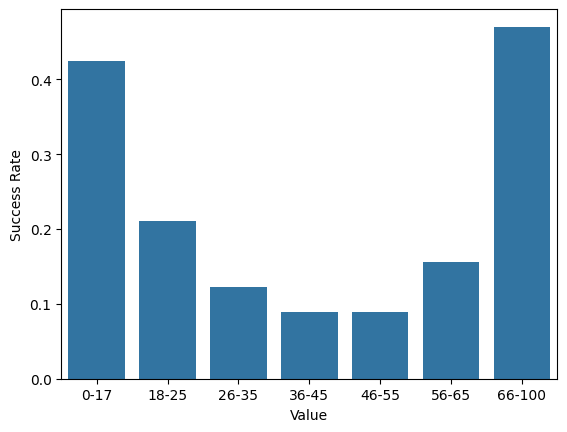

In [ ]:
sns.barplot(x = 'Value', y = 'Success Rate' ,data=age_group_df)

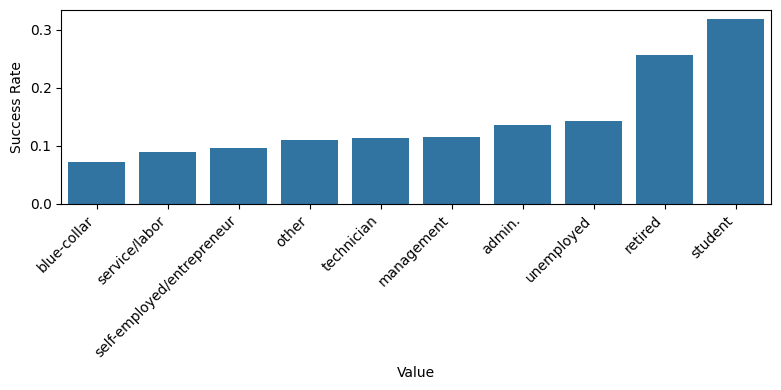

In [ ]:
job_group_df = table_2[table_2['Feature']=='job_grouped'].sort_values(by='Success Rate', ascending=True)

plt.figure(figsize=(8,4))
sns.barplot(x = 'Value', y = 'Success Rate' ,data=job_group_df)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # adjusts layout so labels don't get cut off
plt.show()

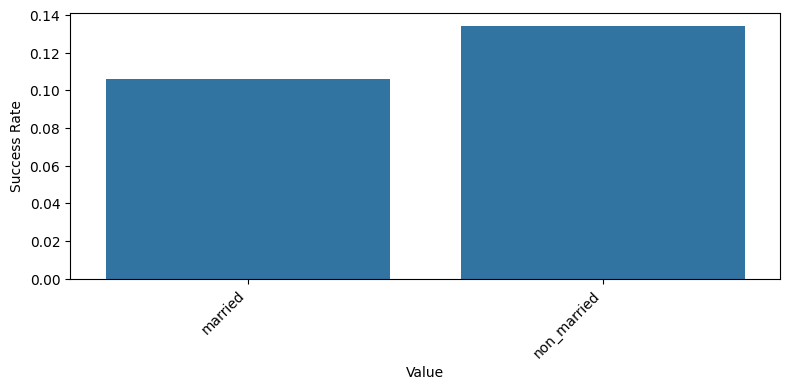

In [ ]:
marital_group_df = table_2[table_2['Feature']=='marital_group'].sort_values(by='Success Rate', ascending=True)

plt.figure(figsize=(8,4))
sns.barplot(x = 'Value', y = 'Success Rate' ,data=marital_group_df)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # adjusts layout so labels don't get cut off
plt.show()

### Analysis on Credit condition

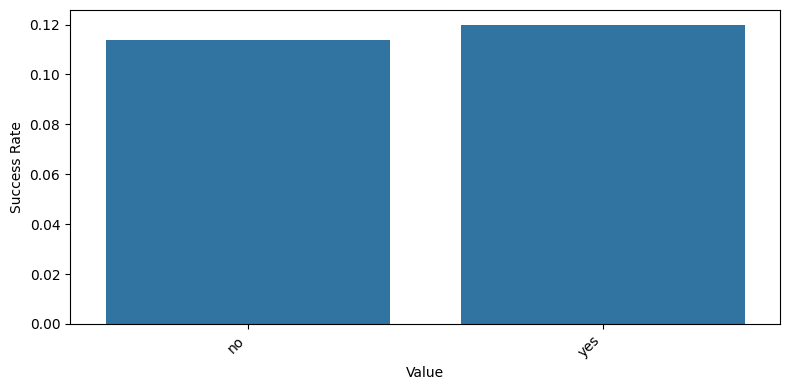

In [ ]:
loan_df = table_2[table_2['Feature']=='has_housing_or_loan'].sort_values(by='Success Rate', ascending=True)

plt.figure(figsize=(8,4))
sns.barplot(x = 'Value', y = 'Success Rate' ,data=loan_df)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # adjusts layout so labels don't get cut off
plt.show()

/tmp/ipython-input-714970483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_loan = df.groupby('age_group')['has_housing_or_loan'].value_counts().reset_index()


<Axes: xlabel='age_group', ylabel='count'>

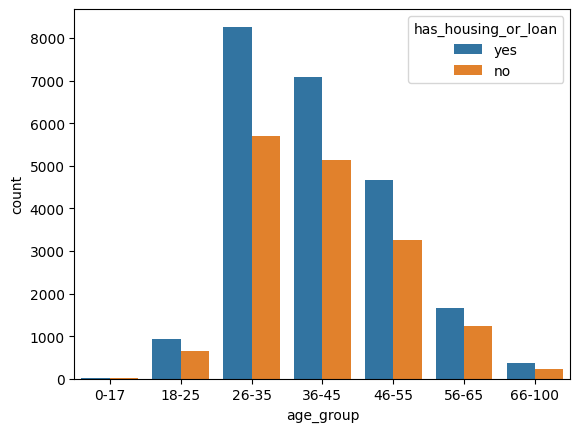

In [ ]:
age_loan = df.groupby('age_group')['has_housing_or_loan'].value_counts().reset_index()
sns.barplot(x='age_group', y = 'count', hue='has_housing_or_loan', data=age_loan)

### Analysis on macro-economic factors

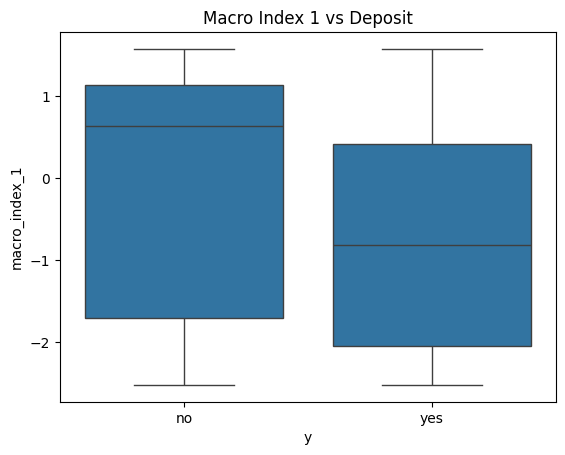

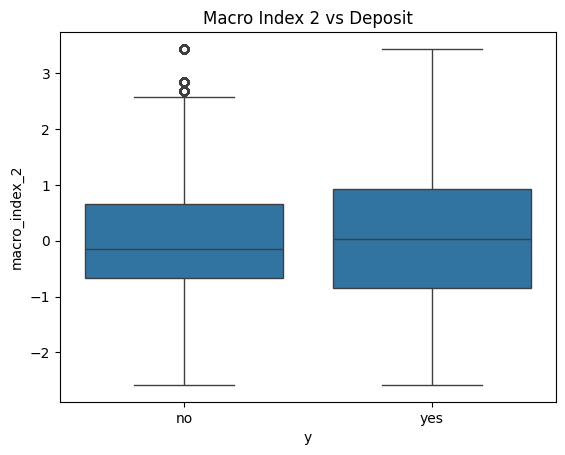

In [ ]:
sns.boxplot(x='y', y='macro_index_1', data=df)
plt.title('Macro Index 1 vs Deposit')
plt.show()

sns.boxplot(x='y', y='macro_index_2', data=df)
plt.title('Macro Index 2 vs Deposit')
plt.show()

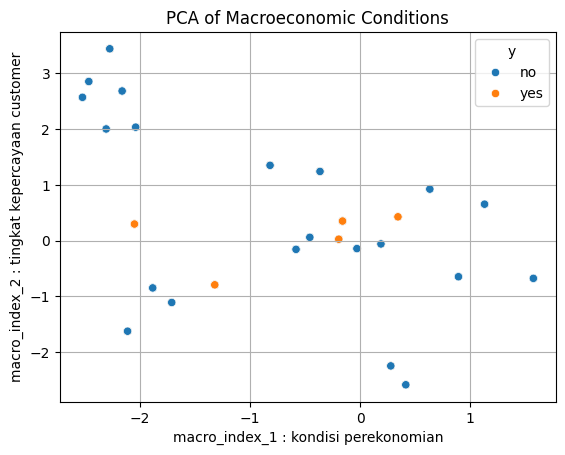

In [ ]:
sns.scatterplot(x='macro_index_1', y='macro_index_2', hue='y', data=df)
plt.title('PCA of Macroeconomic Conditions')
plt.xlabel('macro_index_1 : kondisi perekonomian')
plt.ylabel('macro_index_2 : tingkat kepercayaan customer')
plt.grid(True)
plt.show()

terlihat bahwa mayoritas titik berlabel yes terkonsentrasi di area tengah plot — mendekati koordinat (0, 0) pada macro_index_1 dan macro_index_2. Ini mengindikasikan bahwa respon positif cenderung muncul dari nasabah yang berada pada kondisi makroekonomi yang relatif stabil, tanpa nilai ekstrim pada kedua indeks tersebut. Dengan kata lain, pelanggan yang berada di situasi ekonomi “sedang” (tidak terlalu tinggi atau rendah dalam variabel makro) tampaknya lebih berpotensi merespons positif dibandingkan yang berada di ujung spektrum.

Insights:
1. Age vs Deposit outcome distribution

##Machine learning



###Spliting dataset

In [ ]:
# The dataset used in the classification modeling is "luxury_apartment"
# Data train (60%), data test(20%), data validation(20%)

X = feature_set_3
y = df['y_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100,stratify = y)

### Feature encoding dan preprocessor

In [ ]:
# Processor creation for machine learning models
from sklearn.preprocessing import RobustScaler

# Define column types based on the dataframe X_train (after splitting)
df_numeric = X_train.select_dtypes(include=np.number).columns.tolist()
# Assuming 'education' and 'age_group' are the ordinal columns you want to encode this way
df_ordinal = ['age_group'] # Corrected to be a list of column names

# Identify columns for one-hot and binary encoding based on number of unique values
# Exclude 'education' and 'age_group' as they are ordinal
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col not in df_ordinal]


df_hot = []
df_binary = []
for col in categorical_cols:
    if X_train[col].nunique() <= 2: # BinaryEncoder works well for 2 unique values
        df_binary.append(col)
    else: # OneHotEncoder for more than 2 unique values
        df_hot.append(col)

print("Numeric columns:", df_numeric)
print("Ordinal columns:", df_ordinal)
print("One-Hot Encoding columns:", df_hot)
print("Binary Encoding columns:", df_binary)


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
     ('scaler', RobustScaler())
])

# Ordinal columns: impute most frequent, then encode
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# One-hot columns: impute most frequent, then encode
one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Binary columns: impute most frequent, then encode
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', BinaryEncoder())
])

# Combine in ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, df_numeric),
        ('ordinal', ordinal_transformer, df_ordinal),
        ('one_hot', one_hot_transformer, df_hot),
        ('binary', binary_transformer, df_binary)
    ],
    remainder='passthrough'
)

print("\nPreprocessor defined with imputers for all column types.")

Numeric columns: ['total_contacts', 'macro_index_1', 'macro_index_2', 'euribor3m']
Ordinal columns: ['age_group']
One-Hot Encoding columns: ['job_grouped', 'education_group', 'day_of_week', 'month']
Binary Encoding columns: ['marital_group', 'has_housing_or_loan', 'contact', 'previous_outcome_success_str']

Preprocessor defined with imputers for all column types.


In [ ]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['total_contacts', 'macro_index_1',
                                  'macro_index_2', 'euribor3m']),
                                ('ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['job_grouped', 'education_group',
                                  'day_of_week', 'month']),
                                ('binary',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', BinaryEncoder())]),
                                 ['marital_group', 'has_housing_or_loan',
                                  'contact', 'previous_outcome_success_str'])])

### Machine learning model

#### model selection

Berikut ini adalah model ML yang akan di seleksi:
1. Decision tree.
2. Random forest.
3. Extra trees.
4. XGboost.
5. LightGMB.

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import RobustScaler

models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    ('Random Forest', RandomForestClassifier(random_state=42, class_weight='balanced')),
    ('Extra Trees', ExtraTreesClassifier(random_state=42, class_weight='balanced')),
    ('XGBoost', XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]))),
    ('LightGBM', LGBMClassifier(random_state=42, class_weight='balanced'))
]
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'f2': f2_scorer,
    'accuracy': 'accuracy'
}

results_list = []

for name, model in models:
    testpipe = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),
        ('model', model)
    ])

    cv_results = cross_validate(testpipe, X_train, y_train, cv=5, scoring=scoring)

    results_list.append({
        'Model': name,
        'Precision': cv_results['test_precision'].mean(),
        'Recall': cv_results['test_recall'].mean(),
        'F1': cv_results['test_f1'].mean(),
        'F2': cv_results['test_f2'].mean(),
        'Accuracy': cv_results['test_accuracy'].mean()
    })

results_df = pd.DataFrame(results_list)
print(results_df)

[LightGBM] [Info] Number of positive: 9686, number of negative: 19372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9993
[LightGBM] [Info] Number of data points in the train set: 29058, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9686, number of negative: 19372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9828
[LightGBM] [Info] Number of data points in the train set: 29058, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9686, number of negative: 19372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9820
[LightGBM] [Info] Number of data points in the train set: 29058, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9686, number of negative: 19372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9806
[LightGBM] [Info] Number of data points in the train set: 29058, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 9686, number of negative: 19372
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9972
[LightGBM] [Info] Number of data points in the train set: 29058, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
           Model  Precision    Recall        F1        F2  Accuracy
0  Decision Tree   0.292165  0.348983  0.317962  0.335847  0.824481
1  Random Forest   0.446274  0.330021  0.379147  0.348015  0.873328
2    Extra Trees   0.381589  0.322557  0.349497  0.332800  0.859257
3        XGBoost   0.330658  0.592896  0.424386  0.511548  0.811285
4       LightGBM   0.495566  0.481036  0.487891  0.483686  0.881566


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Informasi yang didapat:

model yang di gunakan adalah (Decision Tree, Random Forest, Extra Trees, XGBoost, LightGBM).

Berikut ini adalah metriks yang di tampilkan (Setiap nilai metrik yang ditampilkan adalah rata-rata dari hasil cross-validation) :
* Precision: Mengukur ketepatan model dalam memprediksi kelas positif (nasabah yang akan deposito).
* Recall: Mengukur kemampuan model untuk menemukan semua instance positif yang sebenarnya (nasabah yang sebenarnya akan deposito). Ini adalah metrik kunci yang kita fokuskan untuk meminimalkan False Negatives.
* F1 Score: Rata-rata harmonis dari precision dan recall, memberikan keseimbangan antara kedua metrik tersebut.
* F2 Score: Memberikan bobot lebih pada Recall dibandingkan Precision, sesuai dengan tujuan bisnis kita untuk meminimalkan False Negatives.
* Accuracy: Mengukur proporsi total prediksi yang benar.

Dengan fokus pada Recall tertinggi, Kita dapat melihat model mana yang paling baik dalam mengidentifikasi nasabah yang berpotensi deposito (kelas positif), yang merupakan tujuan utama kita untuk meningkatkan efisiensi campaign pemasaran dan meminimalkan Type 2 error (kehilangan calon nasabah potensial). Berdasarkan hasil tabel results_df, model XGBoost memiliki nilai Recall rata-rata tertinggi (0.596630).

#### model selected : XGboost

Dari hasil code sebelum nya xgboost menjadi model yang dipilih karena memiliki nilai recall yang terbaik. pada bagian ini kita akan melakukan hyper parameter tuning guna memperoleh model machine leaarning XGboost terbaik

In [ ]:
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric=['aucpr','auc'],
    random_state=42
)

##### pipeline

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
#membuat
pipeline = ImbPipeline([
    ('preprocess', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.3, random_state=42)),
    ('clf', xgb_clf),
])



In [ ]:
# Compute class imbalance ratio
neg = sum(y_train == 0)
pos = sum(y_train == 1)
ratio = neg / pos
ratio

7.52486016159105

In [ ]:
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['total_contacts',
                                                   'macro_index_1',
                                                   'macro_index_2',
                                                   'euribor3m']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder(handle_unkno...
                               feature_weights=None, gamma=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

##### Hyperparameter tuning

In [ ]:
param_grid = {
    'clf__max_depth': [3, 5,8],
    'clf__min_child_weight': [1,3,5],
    'clf__learning_rate': [0.05],
    'clf__n_estimators': [300,500,1000 ],
    'clf__scale_pos_weight': [3,ratio],
    'clf__colsample_bytree':[0.7],
    'clf__reg_alpha':[1],
    'clf__reg_lambda':[5]

}

scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'accuracy': 'accuracy'
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [12:48:26] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Evaluation Model

In [ ]:
threshold = 0.4  # adjust as needed

y_train_probs = best_model.predict_proba(X_train)[:, 1]
y_test_probs = best_model.predict_proba(X_test)[:, 1]

y_train_pred_thresh = (y_train_probs >= threshold).astype(int)
y_test_pred_thresh = (y_test_probs >= threshold).astype(int)

print("Best Parameters:", grid.best_params_)
print(f"=== Train Classification Report (threshold={threshold}) ===")
print(classification_report(y_train, y_train_pred_thresh, digits=2))
print(f"=== Test Classification Report (threshold={threshold}) ===")
print(classification_report(y_test, y_test_pred_thresh, digits=2))

Best Parameters: {'clf__colsample_bytree': 0.7, 'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__min_child_weight': 3, 'clf__n_estimators': 500, 'clf__reg_alpha': 1, 'clf__reg_lambda': 5, 'clf__scale_pos_weight': 3}
=== Train Classification Report (threshold=0.4) ===
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     24215
           1       0.43      0.61      0.50      3218

    accuracy                           0.86     27433
   macro avg       0.69      0.75      0.71     27433
weighted avg       0.88      0.86      0.87     27433

=== Test Classification Report (threshold=0.4) ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     10379
           1       0.41      0.60      0.49      1379

    accuracy                           0.85     11758
   macro avg       0.68      0.74      0.70     11758
weighted avg       0.88      0.85      0.86     11758



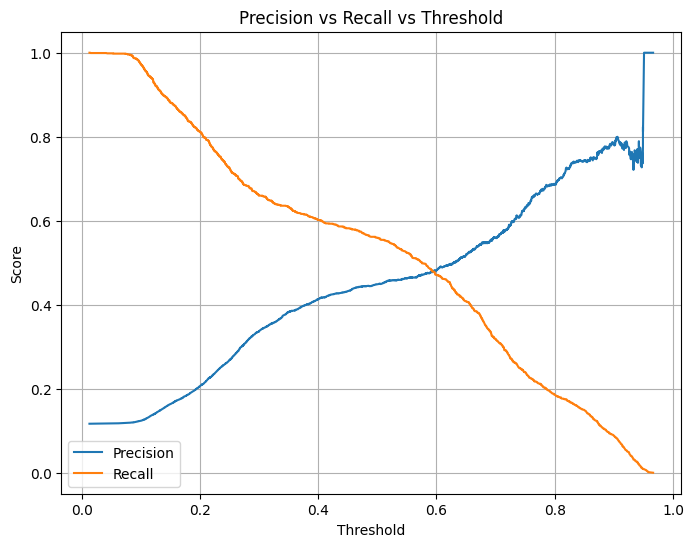

In [ ]:
#grafik1
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_probs)
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision vs Recall vs Threshold")
plt.grid(True)
plt.legend()
plt.show()

Grafik 'Precision vs Recall vs Threshold' menunjukkan bagaimana nilai precision dan recall model berubah seiring dengan perubahan nilai threshold klasifikasi.

* Precision (garis biru): Menunjukkan proporsi prediksi positif yang benar. Semakin tinggi threshold, semakin tinggi precision, karena model hanya memprediksi "yes" untuk kasus yang sangat yakin.
* Recall (garis oranye): Menunjukkan proporsi kasus positif yang berhasil ditangkap oleh model. Semakin rendah threshold, semakin tinggi recall, karena model lebih longgar dalam memprediksi "yes" dan menangkap lebih banyak kasus positif.

Dengan grafik ini, kita dapat memilih nilai threshold yang paling sesuai dengan tujuan bisnis. Jika ingin meminimalkan False Positives (mengurangi biaya kontak ke nasabah yang tidak berpotensi), kita dapat memilih threshold yang lebih tinggi (prioritaskan precision). Jika ingin meminimalkan False Negatives (tidak kehilangan calon nasabah potensial), kita dapat memilih threshold yang lebih rendah (prioritaskan recall).

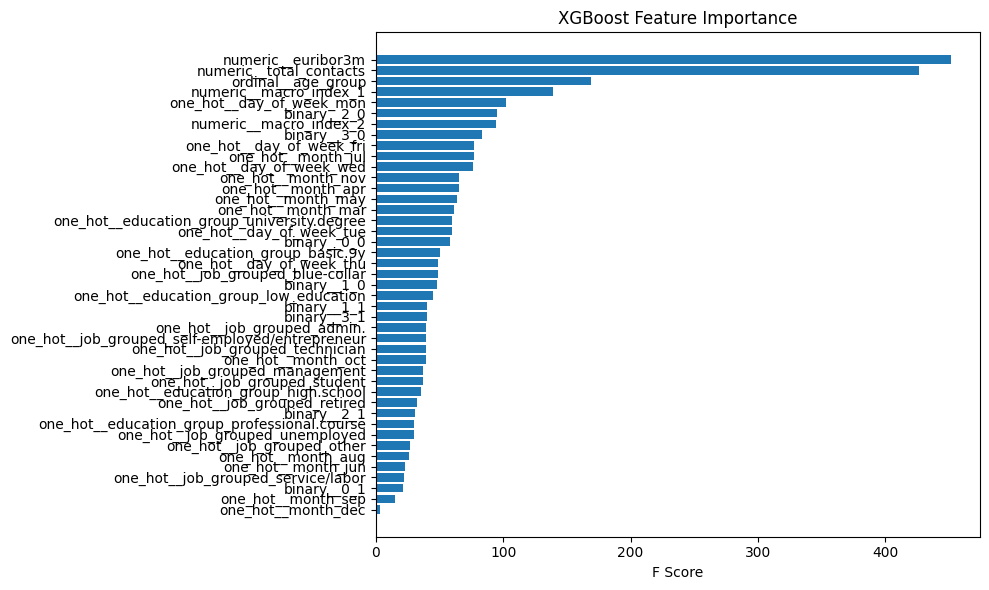

In [ ]:
#grafik 2
#Feature importance
# Get feature names after preprocessing
fitted_preprocessor = best_model.named_steps['preprocess']
feature_names_out = fitted_preprocessor.get_feature_names_out()

xgb_fitted = best_model.named_steps['clf']

# Get feature importances from the fitted XGBoost model
importance_dict = xgb_fitted.get_booster().get_score(importance_type='weight')

# Map importance scores to feature names using the correct order
mapped_importance = {
    feature_names_out[int(k[1:])]: v for k, v in importance_dict.items() if int(k[1:]) < len(feature_names_out)
}


importance_df = pd.DataFrame({
    'Feature': list(mapped_importance.keys()),
    'FScore': list(mapped_importance.values())
}).sort_values(by='FScore', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:50][::-1], importance_df['FScore'][:50][::-1])
plt.xlabel('F Score')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

Grafik 'XGBoost Feature Importance' menunjukkan seberapa penting setiap fitur dalam dataset untuk prediksi yang dibuat oleh model XGBoost.

* Sumbu Y: Menampilkan nama-nama fitur yang digunakan dalam model.
* Sumbu X (F Score): Menunjukkan skor kepentingan (F Score) untuk setiap fitur. Skor yang lebih tinggi menunjukkan bahwa fitur tersebut lebih sering digunakan dalam pohon keputusan di dalam model XGBoost dan memiliki kontribusi yang lebih besar dalam memecah data dan meningkatkan akurasi prediksi.

 99%|===================| 11595/11758 [01:19<00:01]       

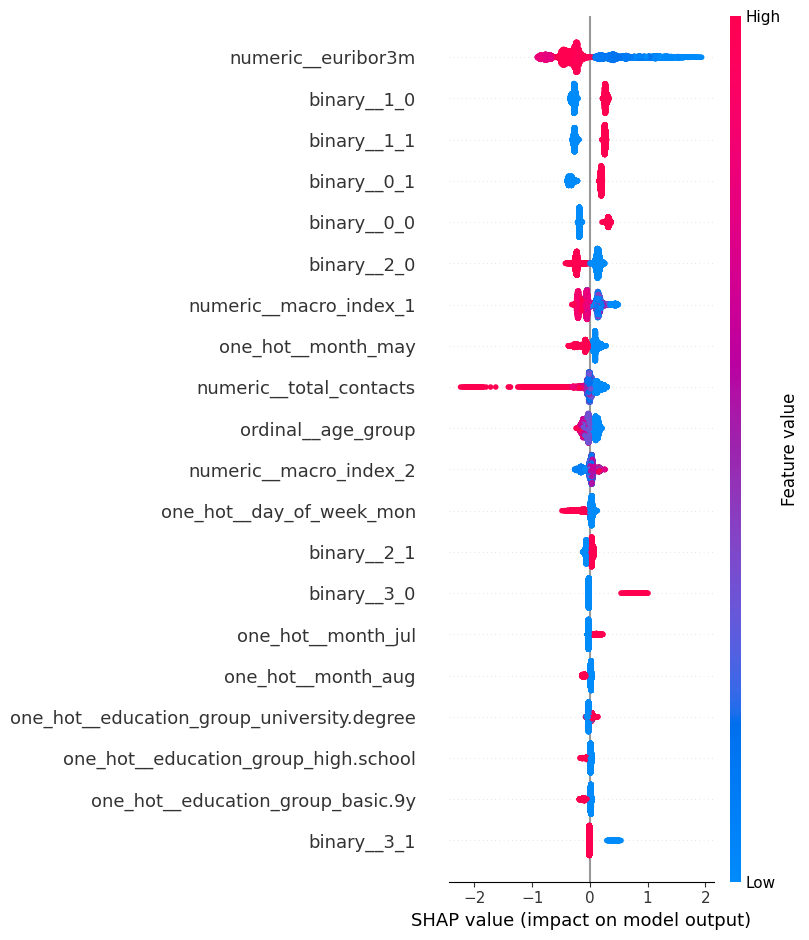

In [ ]:
# --- Preprocess data ---
X_train_processed = fitted_preprocessor.transform(X_train)
X_test_processed = fitted_preprocessor.transform(X_test)

# Get feature names after preprocessing
feature_names_out = fitted_preprocessor.get_feature_names_out()

# --- SHAP Calculation ---
explainer = shap.Explainer(xgb_fitted, X_train_processed)
shap_values = explainer(X_test_processed)

# --- Global Feature Importance (Mean Absolute SHAP Value) ---
shap_importance = pd.DataFrame({
    'feature': feature_names_out,
    'mean_abs_shap': np.abs(shap_values.values).mean(axis=0)
}).sort_values(by='mean_abs_shap', ascending=False)

# Visualize
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names_out)

In [ ]:
# --- Save to CSV ---
shap_importance.to_csv(output_path, index=False)

# Download file CSV
from google.colab import files
files.download("shap_feature_importance.csv")

NameError: name 'shap_importance' is not defined

Berikut adalah informasi kunci yang dapat kita peroleh dari plot tersebut:

1. Daftar Fitur Penting: Fitur-fitur diurutkan berdasarkan rata-rata magnitudo dampak (mean absolute SHAP value) pada prediksi. Fitur di bagian atas plot memiliki pengaruh terbesar pada prediksi model secara keseluruhan. Dari plot yang dibuat, terlihat bahwa fitur-fitur teratas yang paling berpengaruh adalah:
- numeric__euribor3m
- binary__1_0
- binary__1_1
- binary__0_1
- binary__2_0
- numeric__macro_index_1
- numeric__total_contacts
- one_hot__month_may
- ordinal__age_group
- numeric__macro_index_2

2. Arah Pengaruh Fitur: Warna pada setiap titik menunjukkan nilai fitur untuk instance (nasabah) tertentu.
- Merah: Menunjukkan nilai fitur yang tinggi.
- Biru: Menunjukkan nilai fitur yang rendah.
- Setiap baris mewakili satu fitur, dan titik-titik di baris tersebut mewakili setiap nasabah dalam dataset pengujian.

3. Magnitudo dan Arah Dampak: Posisi horizontal setiap titik menunjukkan dampak SHAP value fitur tersebut pada prediksi model untuk nasabah tertentu.
- Titik di sebelah kanan garis vertikal (SHAP value > 0) menunjukkan bahwa nilai fitur tersebut meningkatkan probabilitas prediksi deposito (y=1).
- Titik di sebelah kiri garis vertikal (SHAP value < 0) menunjukkan bahwa nilai fitur tersebut menurunkan probabilitas prediksi deposito (y=1).

berikut ini adalah beberapa fitur teratas berdasarkan plot yang dibuat:

- numeric__euribor3m: Terlihat ada campuran titik merah dan biru di kedua sisi garis vertikal. Ini menunjukkan bahwa nilai euribor3m yang berbeda memiliki pengaruh yang bervariasi pada probabilitas deposito. Titik-titik merah (nilai euribor3m tinggi) cenderung berada di sebelah kiri (menurunkan probabilitas deposito), sementara titik-titik biru (nilai euribor3m rendah) cenderung berada di sebelah kanan (meningkatkan probabilitas deposito). Ini mengindikasikan bahwa suku bunga Euribor yang lebih rendah cenderung meningkatkan kemungkinan nasabah melakukan deposito.

- numeric__total_contacts: Mirip dengan euribor3m, ada campuran warna. Namun, tampaknya nilai total_contacts yang lebih tinggi (merah) cenderung memiliki SHAP value positif (meningkatkan probabilitas deposito), meskipun ada juga titik merah di sebelah kiri. Sebaliknya, nilai total_contacts yang lebih rendah (biru) cenderung memiliki SHAP value negatif (menurunkan probabilitas deposito). Ini menunjukkan bahwa kontak yang lebih sering dapat meningkatkan kemungkinan deposito, tetapi mungkin ada titik jenuh atau faktor lain yang memengaruhi.

- ordinal__age_group: Terlihat bahwa nilai age_group yang lebih tinggi (merah) cenderung memiliki SHAP value positif (meningkatkan probabilitas deposito), sementara nilai age_group yang lebih rendah (biru) cenderung memiliki SHAP value negatif (menurunkan probabilitas deposito). Ini mendukung temuan sebelumnya bahwa kelompok usia yang lebih tua (66-100) memiliki tingkat keberhasilan deposito yang lebih tinggi.

- one_hot__month_may: Fitur one-hot encoding untuk bulan Mei. Titik merah (berarti nasabah dihubungi di bulan Mei) cenderung memiliki SHAP value negatif yang signifikan, menunjukkan bahwa dihubungi di bulan Mei cenderung menurunkan probabilitas deposito. Ini konsisten dengan analisis EDA di mana bulan Mei memiliki tingkat keberhasilan deposito terendah.

ROC Curve and Precision-Recall curve (machine learning model clasification)

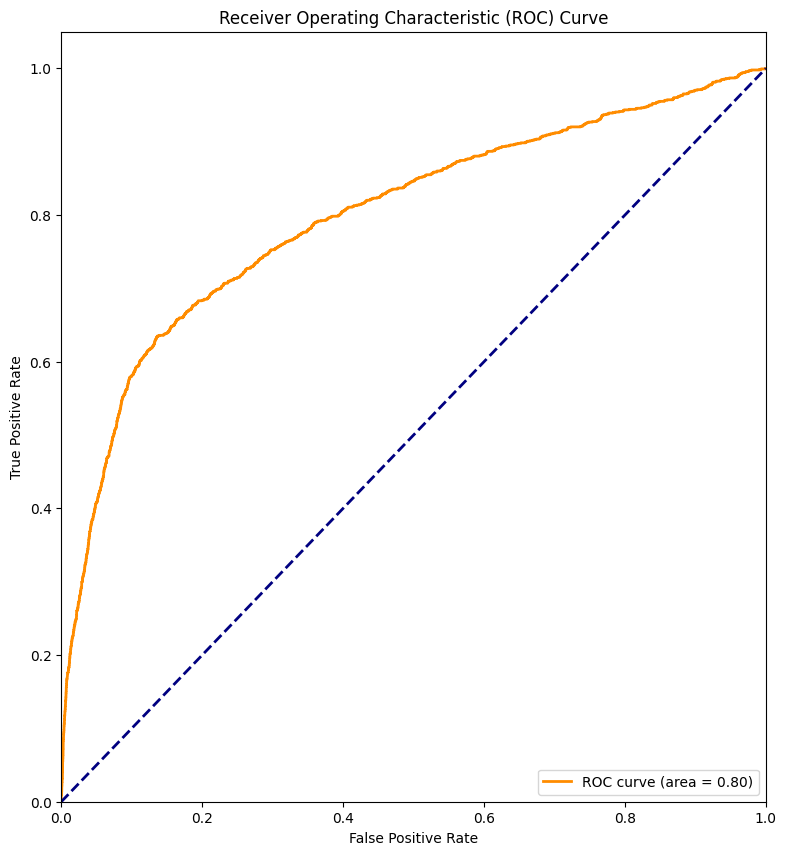

In [ ]:
#grafik3
y_probability = best_model.predict_proba(X_test)[:, 1]
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probability)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

Grafik 'Receiver Operating Characteristic (ROC) Curve' adalah alat evaluasi penting untuk model klasifikasi biner. Grafik ini menunjukkan kinerja model di semua kemungkinan nilai threshold klasifikasi.

* Sumbu X (False Positive Rate - FPR): Menunjukkan proporsi kasus negatif yang salah diklasifikasikan sebagai positif (Type 1 error).
* Sumbu Y (True Positive Rate - TPR) atau Recall: Menunjukkan proporsi kasus positif yang berhasil diklasifikasikan sebagai positif (kemampuan model untuk menemukan semua kasus positif).

berdasarkan grafik model yang dibuat sudah bagus karena auc(area under curve) lebih dari 0,5. namun tentu saja dapat ditingkatkan lagi kedepan nya agar aoc mendekati 1.

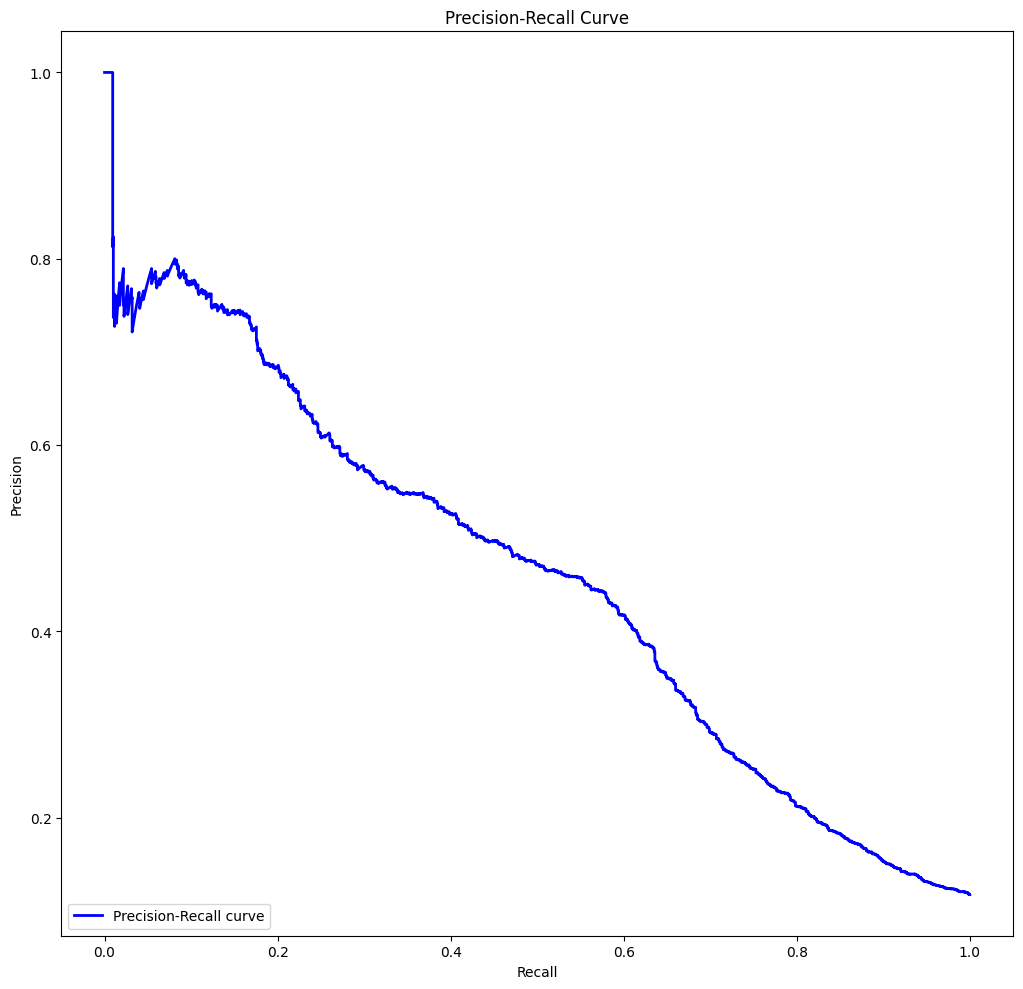

In [ ]:
# PRC Curve
precision, recall, _ = precision_recall_curve(y_test, y_probability)
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

Grafik 'Precision-Recall Curve' sangat berguna, terutama untuk dataset yang tidak seimbang. Grafik ini menunjukkan trade-off antara Precision (ketepatan) dan Recall (cakupan) untuk kelas positif (nasabah yang akan deposito) di berbagai nilai threshold klasifikasi.

* Sumbu X (Recall): Menunjukkan proporsi kasus positif yang berhasil ditangkap oleh model.
* Sumbu Y (Precision): Menunjukkan proporsi prediksi positif yang benar.

Grafik 'Precision-Recall Curve'menunjukkan kemampuan untuk mencapai Recall yang lebih tinggi, meskipun dengan penurunan Precision. Ini konsisten dengan tujuan yang ingin di capai yaitu untuk memprioritaskan Recall untuk meminimalkan False Negatives (kehilangan calon nasabah potensial).

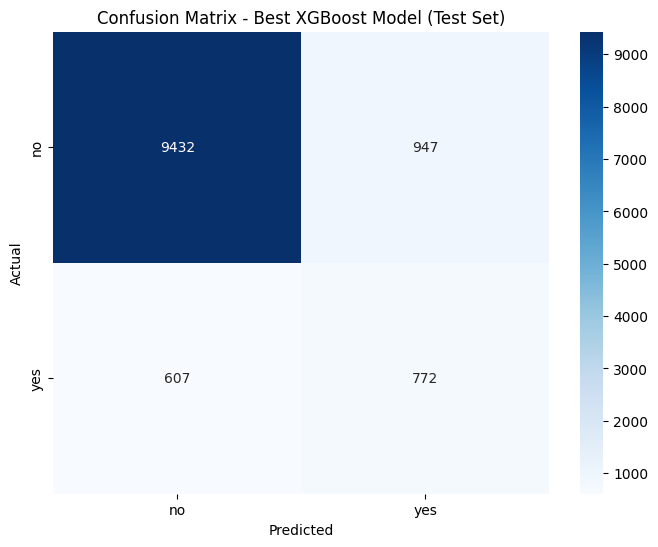

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the best XGBoost model on the test set
y_pred_test = best_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best XGBoost Model (Test Set)')
plt.show()

Grafik 'Confusion Matrix - Best XGBoost Model (Test Set)' adalah ringkasan visual dari kinerja model klasifikasi pada test set. Grafik ini menunjukkan berapa banyak prediksi yang dibuat model sudah benar dan berapa banyak yang salah, dibandingkan dengan nilai aktual.

Matriks ini terdiri dari empat sel:

* True Negatives (TN - kiri atas): Jumlah nasabah yang sebenarnya tidak deposito (Actual: no) dan diprediksi tidak deposito oleh model (Predicted: no). Ini adalah prediksi negatif yang benar.
* False Positives (FP - kanan atas): Jumlah nasabah yang sebenarnya tidak deposito (Actual: no) tetapi diprediksi akan deposito oleh model (Predicted: yes). Ini adalah Type 1 error dan merupakan kontak yang tidak efektif.
* False Negatives (FN - kiri bawah): Jumlah nasabah yang sebenarnya akan deposito (Actual: yes) tetapi diprediksi tidak deposito oleh model (Predicted: no). Ini adalah Type 2 error dan merupakan calon nasabah potensial yang terlewatkan.
* True Positives (TP - kanan bawah): Jumlah nasabah yang sebenarnya akan deposito (Actual: yes) dan diprediksi akan deposito oleh model (Predicted: yes). Ini adalah prediksi positif yang benar dan merupakan nasabah potensial yang berhasil diidentifikasi.

berdasarkan Grafik 'Confusion Matrix - Best XGBoost Model (Test Set)' model yang dibuat sudah cukup baik kareana, model dapat menangkap lebih dari separuh nasabah potensial.

In [ ]:
df_pred = df.copy()

# Pisahkan fitur (tanpa kolom target)
X = df_pred.drop(columns=['y_encoded'])

# Prediksi probabilitas untuk seluruh dataset
proba = best_model.predict_proba(X)[:, 1]  # ambil probabilitas kelas 'yes'

# Tambahkan kolom hasil prediksi
df_pred['deposit_probability (%)'] = (proba * 100).round(1)  # dalam persen
df_pred['deposit_label'] = np.where(proba >= threshold, 'yes', 'no')  # threshold 50%
df_pred.sort_values(by='deposit_probability (%)', ascending=False).head(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,...,previous_outcome_success,previous_outcome_success_str,success_rate_previous_contacts,success_rate_previous_contacts_v2,macro_index_1,macro_index_2,age_group_success_interaction,y_encoded,deposit_probability (%),deposit_label
39378,68,retired,divorced,basic.4y,yes,no,cellular,mar,tue,2,...,1,success,1.0,1.0,-0.816898,1.344644,66-100_1,1,96.599998,yes
39134,66,retired,married,basic.4y,yes,no,cellular,mar,tue,1,...,1,success,1.0,1.0,-0.816898,1.344644,66-100_1,1,96.599998,yes
39147,19,student,single,basic.6y,yes,no,cellular,mar,tue,1,...,1,success,0.5,0.5,-0.816898,1.344644,18-25_1,1,96.500000,yes
39348,78,retired,married,unknown,no,no,cellular,mar,thu,1,...,1,success,0.5,0.5,-0.816898,1.344644,66-100_1,1,96.300003,yes
39295,52,admin.,married,university.degree,no,no,cellular,mar,tue,1,...,1,success,0.5,0.5,-0.816898,1.344644,46-55_1,1,96.199997,yes
39338,27,admin.,single,unknown,no,no,cellular,mar,tue,1,...,1,success,1.0,1.0,-0.816898,1.344644,26-35_1,1,96.199997,yes
39227,64,retired,married,university.degree,no,no,cellular,mar,tue,2,...,1,success,1.0,1.0,-0.816898,1.344644,56-65_1,1,96.199997,yes
39498,80,retired,divorced,basic.4y,yes,yes,cellular,apr,thu,1,...,1,success,0.5,0.5,-0.363601,1.237000,66-100_1,1,96.199997,yes
39215,64,retired,married,university.degree,no,no,cellular,mar,tue,2,...,1,success,1.0,1.0,-0.816898,1.344644,56-65_1,1,96.199997,yes
39180,64,retired,married,university.degree,no,no,cellular,mar,fri,1,...,1,success,0.5,0.5,-0.816898,1.344644,56-65_1,0,96.000000,yes


In [ ]:
# Simpan ke CSV
df_pred.to_csv('dataset_with_predictions.csv', index=False)

# Conclusion and Recommendation

## Conclusion

Dari analisis data dan pembangunan model klasifikasi XGBoost, kita dapat menyimpulkan hal-hal berikut terkait dengan tujuan bank:

1. Prediksi Nasabah Potensial Deposito: Model XGBoost yang telah di-tuning menunjukkan kemampuan yang cukup baik dalam mengidentifikasi nasabah yang berpotensi melakukan deposito, seperti yang terlihat dari nilai Recall sebesar 0.60 pada data validasi. Ini berarti model dapat menangkap sekitar 60% dari semua nasabah yang sebenarnya akan melakukan deposito. Meskipun Precision (0.43) masih perlu ditingkatkan untuk mengurangi kontak yang tidak efektif (False Positives), nilai Recall yang cukup tinggi ini menunjukkan bahwa model berpotensi membantu tim marketing memfokuskan upaya pada segmen nasabah yang lebih menjanjikan, sehingga meningkatkan efisiensi kampanye.
2. Faktor-faktor yang Mempengaruhi Keputusan Deposito: Berdasarkan analisis Feature Importance dari model XGBoost, beberapa variabel menunjukkan pengaruh yang signifikan terhadap keputusan nasabah untuk melakukan deposito. Faktor-faktor utama yang paling memengaruhi adalah:
* euribor3m : Suku bunga Euribor 3 bulan, dimana bank zona euro menawarkan untuk meminjamkan dana tanpa jaminan dengan rate khusus.
* Total Contacts: Jumlah total kontak yang dilakukan selama kampanye ini dan sebelumnya. Ini menunjukkan bahwa frekuensi kontak memiliki dampak besar pada hasil deposito.
* age_group : pengelompokan usia nasabah dan calon nasabah
* Macro Index 1 & 2: Indeks makroekonomi yang dihasilkan dari PCA (Principal Component Analysis) pada variabel seperti emp.var.rate, cons.price.idx, dan cons.conf.idx. Ini mengindikasikan bahwa kondisi ekonomi secara keseluruhan memainkan peran penting.



#### Penargetan nasabah yang tepat

In [ ]:
df_prediction.deposit_label.value_counts()

,count
deposit_label,
no,32047
yes,7144


In [ ]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39191 entries, 0 to 39190
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           39191 non-null  int64  
 1   job                           39191 non-null  object 
 2   marital                       39191 non-null  object 
 3   education                     39191 non-null  object 
 4   housing                       39191 non-null  object 
 5   loan                          39191 non-null  object 
 6   contact                       39191 non-null  object 
 7   month                         39191 non-null  object 
 8   day_of_week                   39191 non-null  object 
 9   campaign                      39191 non-null  int64  
 10  pdays                         39191 non-null  float64
 11  previous                      39191 non-null  int64  
 12  poutcome                      39191 non-null  object 
 13  e

In [ ]:
df.y.value_counts()

,count
y,
no,34594
yes,4597


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39191 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             39191 non-null  int64  
 1   job             39191 non-null  object 
 2   marital         39191 non-null  object 
 3   education       39191 non-null  object 
 4   housing         39191 non-null  object 
 5   loan            39191 non-null  object 
 6   contact         39191 non-null  object 
 7   month           39191 non-null  object 
 8   day_of_week     39191 non-null  object 
 9   campaign        39191 non-null  int64  
 10  pdays           39191 non-null  int64  
 11  previous        39191 non-null  int64  
 12  poutcome        39191 non-null  object 
 13  emp.var.rate    39191 non-null  float64
 14  cons.price.idx  39191 non-null  float64
 15  cons.conf.idx   39191 non-null  float64
 16  euribor3m       39191 non-null  float64
 17  nr.employed     39191 non-null  floa

diasumsikan pada kampanye berikutnya dilakukan pada jumlah calon nasabah yang sama: 39191 calon nasabah.

dari value counts diatas:

no model :     
yes = 4597
no = 34594

dengan model :    
yes = 7144
no = 32047

maka bisa ditarik kesimpulan :
penolakan deposit berkurang 7 % dan penerimaan deposit naik 55%.

#### Optimalisasi biaya

berdasarkan cost analysis diawal:

operational cost : 3 EUR

bunga dan adm lain : 7 EUR

opportunity cost : 13 EUR

FP:957 calon nasabah  | biaya yang keluar => operational cost : 3 EUR

FN:607 calon nasabah  | biaya yang keluar => opportunity cost - adm cost : 6 EUR

TN:9432 calon nasabah | biaya yang keluar => 0

TP:772 calon nasabah  | biaya yang keluar => opportunity cost - adm cost - operational cost : 3 EUR

-------------------------------------------------------------------------------
Tanpa Model (semua kandidat kita check dan tawarkan) :
- Total Kandidat melakukan deposito
  => 1379 calon nasabah
  (1379 x 13 EUR) - (1379 x 7 EUR) - (1379 x 3 EUR)  = 4137
- Total Kandidat Tidak melakukan deposito
  => 10389 calon nasabah
  -(10389 x 3 EUR) = -31167 EUR

untung/rugi = 4137 + (-31167) = -27.030

-------------------------------------------------------------------------------
Dengan Model (hanya kandidat yang diprediksi oleh model tertarik yang kita check dan tawarkan) :
FP:957 calon nasabah  x -(3 EUR) = -2871 EUR

FN:607 calon nasabah  x -(6 EUR) = -3642 EUR

TN:9432 calon nasabah x 0 EUR = 0 EUR

TP:772 calon nasabah  x 3 EUR = 2316 EUR

untung/rugi = -4179 EUR

Dengan demikian menggunakan model machine learning kita dapat menghemat cost penawaran deposito sebesar 22.851 EUR

## Rekomendasi

Berdasarkan analisis data dan model machine learning yang sudah dibuat, berikut beberapa rekomendasi yang bisa dilakukan bank untuk meningkatkan model dan kampanye pemasaran kedepannya :

1. Tingkatkan Kualitas Data: Beberapa fitur kategorikal memiliki kategori 'unknown' dengan jumlah yang signifikan. Jika memungkinkan, bank dapat mengupayakan pengumpulan data yang lebih lengkap dan akurat untuk mengurangi nilai 'unknown' ini. Selain itu, data historis kampanye dengan informasi yang lebih rinci (misalnya, jenis penawaran spesifik, respons awal nasabah) dapat sangat membantu.

2. Implementasikan Strategi Penargetan Berbasis Probabilitas: Gunakan model terbaik untuk mengidentifikasi calon nasabah dengan probabilitas deposito tertinggi. Fokuskan upaya tim marketing pada segmen ini.

3. Pantau dan Evaluasi Model Secara Berkala: Kondisi pasar dan perilaku nasabah dapat berubah. Penting untuk memantau kinerja model secara berkala dengan data terbaru dan melakukan retraining model jika diperlukan.

4. Uji A/B Testing Kampanye: Lakukan uji A/B testing dengan menargetkan kelompok nasabah berdasarkan prediksi model dan membandingkannya dengan kelompok kontrol. Ini akan memberikan bukti empiris tentang efektivitas penargetan berbasis model.

5. Analisis Faktor Eksternal: Selain data nasabah, pertimbangkan untuk memasukkan data eksternal yang relevan seperti tren ekonomi regional, kebijakan suku bunga bank sentral, atau aktivitas pesaing.
Dengan menerapkan langkah-langkah ini, bank dapat terus meningkatkan kemampuan prediksinya, mengoptimalkan alokasi sumber daya pemasaran, dan pada akhirnya meningkatkan tingkat konversi deposito secara lebih efektif.

### Implementasi Model

Untuk mengimplementasikan model XGBoost yang telah di-tuning ini dalam skenario bisnis nyata, pendekatan yang disarankan adalah sebagai berikut:

1.  **Identifikasi Calon Nasabah Potensial:** Gunakan model terbaik (`best_model`) untuk memprediksi probabilitas (`predict_proba`) nasabah akan melakukan deposito (`y=1`) pada data nasabah baru atau yang akan menjadi target kampanye berikutnya.
2.  **Prioritaskan Berdasarkan Probabilitas:** Urutkan calon nasabah berdasarkan probabilitas prediksi mereka untuk melakukan deposito dari yang tertinggi hingga terendah.
3.  **Strategi Penawaran Bertahap:** Tim marketing dapat memprioritaskan penawaran (misalnya melalui telepon atau metode kontak lainnya) kepada nasabah yang memiliki probabilitas prediksi tertinggi terlebih dahulu. Ini bertujuan untuk memaksimalkan efisiensi dengan menjangkau nasabah yang paling mungkin menerima tawaran.
4.  **Verifikasi Efektivitas Penargetan Berbasis Probabilitas:** Sebelum sepenuhnya mengandalkan urutan probabilitas prediksi untuk penargetan, sangat penting untuk melakukan validasi. Ambil sampel nasabah dari berbagai rentang probabilitas prediksi dan lakukan kampanye penawaran. Bandingkan tingkat konversi (jumlah nasabah yang benar-benar melakukan deposito) di setiap rentang probabilitas. Tujuannya adalah untuk memverifikasi apakah nasabah dengan probabilitas prediksi yang lebih tinggi memang memiliki tingkat konversi yang secara signifikan lebih tinggi. Hasil verifikasi ini akan mengkonfirmasi apakah strategi penargetan berdasarkan probabilitas prediksi efektif dan memberikan bukti empiris untuk mendukung pendekatan ini.
5.  **Adaptasi Berkelanjutan:** Berdasarkan hasil verifikasi, strategi penargetan dapat disesuaikan. Jika terbukti efektif, bank dapat melanjutkan penargetan berdasarkan probabilitas prediksi. Jika tidak, mungkin diperlukan penyesuaian model atau strategi penargetan lainnya.

Pendekatan ini memungkinkan bank untuk memanfaatkan kekuatan prediktif model machine learning untuk mengoptimalkan kampanye pemasaran dan sumber daya yang ada.